In [1]:
#  Globals

#  clears all objects in "global environment"
rm(list=ls())

# ************************************************
# Global Environment variables
# - i.e. available to all functions
#
# Good practice to place "constants" in named variables
# I use UPPERCASE to identify these in my code

DATASET_FILENAME  <- "./combined.csv"          # Name of input dataset file
OUTPUT_FIELD      <- "satisfaction_v2"             # Field name of the output class to predict

#DATASET_FILENAME  <- "zoocust1.csv"        # Name of input dataset file
#OUTPUT_FIELD      <- "churned"             # Field name of the output class to predict

#DATASET_FILENAME  <- "adultSalaryData.csv" # Name of input dataset file
#OUTPUT_FIELD      <- "Salary"              # Field name of the output class to predict

HOLDOUT           <- 70                   # % split to create TRAIN dataset

SCALE_DATASET     <- TRUE                 # Set to true to scale dataset before ML stage
OUTLIER_CONF      <- 0.9                  # Confidence p-value for outlier detection
                                          # Set to negative means analyse but do not replace outliers

TYPE_DISCRETE     <- "DISCRETE"           # field is discrete (numeric)
TYPE_ORDINAL      <- "ORDINAL"            # field is continuous numeric
TYPE_SYMBOLIC     <- "SYMBOLIC"           # field is a string
TYPE_NUMERIC      <- "NUMERIC"            # field is initially a numeric
TYPE_IGNORE       <- "IGNORE"             # field is not encoded

DISCRETE_BINS     <- 6                    # Number of empty bins to determine discrete
MAX_LITERALS      <- 55                   # Maximum numner of hotcoding new fields

# ************************************************
# Define and then load the libraries used in this project
# Library from CRAN     Version
# pacman	             0.5.1
# outliers	             0.14
# corrplot	             0.84
# MASS	                 7.3.53
# formattable 	         0.2.0.1
# stats                  4.0.3
# PerformanceAnalytics   2.0.4

MYLIBRARIES<-c("outliers",
               "corrplot",
               "MASS",
               "formattable",
               "stats",
               "caret",
               "PerformanceAnalytics",
               "smotefamily")

source('functions.R')
# ************************************************
# This is where R starts execution

# Automatically release memory
gc()

# Tries to clear plots and other graphics in RStudio output
if(!is.null(dev.list())) dev.off()
graphics.off()

# This clears all warning messages
#assign("last.warning", NULL, envir = baseenv())

# clears the RStudio console area
cat("\014")

# If library not already on your computer this will download and
# install the library. Each library is activated.
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,624085,33.4,1338672,71.5,1324562,70.8
Vcells,1153959,8.9,8388608,64.0,1856956,14.2


null device 
          1

In [2]:
installed.packages()

,Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,MD5sum,NeedsCompilation,Built
abind,abind,/vol/research/AVGAN/Anaconda_Installation/anaconda3/envs/jupyter/lib/R/library,1.4-5,NA,R (>= 1.5.0),"methods, utils",NA,NA,NA,LGPL (>= 2),NA,NA,NA,NA,no,4.1.3
attention,attention,/vol/research/AVGAN/Anaconda_Installation/anaconda3/envs/jupyter/lib/R/library,0.2.0,NA,NA,NA,NA,"covr, knitr, rmarkdown, testthat (>= 3.0.0)",NA,GPL (>= 3),NA,NA,NA,NA,no,4.1.3
backports,backports,/vol/research/AVGAN/Anaconda_Installation/anaconda3/envs/jupyter/lib/R/library,1.4.1,NA,R (>= 3.0.0),NA,NA,NA,NA,GPL-2 | GPL-3,NA,NA,NA,NA,yes,4.1.3
base,base,/vol/research/AVGAN/Anaconda_Installation/anaconda3/envs/jupyter/lib/R/library,4.1.3,base,NA,NA,NA,methods,NA,Part of R 4.1.3,NA,NA,NA,NA,NA,4.1.3
base64enc,base64enc,/vol/research/AVGAN/Anaconda_Installation/anaconda3/envs/jupyter/lib/R/library,0.1-3,NA,R (>= 2.9.0),NA,NA,NA,png,GPL-2 | GPL-3,NA,NA,NA,NA,yes,4.1.0
bitops,bitops,/vol/research/AVGAN/Anaconda_Installation/anaconda3/envs/jupyter/lib/R/library,1.0-7,NA,NA,NA,NA,NA,NA,GPL (>= 2),NA,NA,NA,NA,yes,4.1.3
boot,boot,/vol/research/AVGAN/Anaconda_Installation/anaconda3/envs/jupyter/lib/R/library,1.3-28,recommended,"R (>= 3.0.0), graphics, stats",NA,NA,"MASS, survival",NA,Unlimited,NA,NA,NA,NA,no,4.1.3
brio,brio,/vol/research/AVGAN/Anaconda_Installation/anaconda3/envs/jupyter/lib/R/library,1.1.3,NA,NA,NA,NA,"covr, testthat (>= 2.1.0)",NA,MIT + file LICENSE,NA,NA,NA,NA,yes,4.1.3
broom,broom,/vol/research/AVGAN/Anaconda_Installation/anaconda3/envs/jupyter/lib/R/library,1.0.1,NA,R (>= 3.1),"backports, dplyr (>= 1.0.0), ellipsis, generics (>= 0.0.2), glue, purrr, rlang, stringr, tibble (>= 3.0.0), tidyr (>= 1.0.0), ggplot2",NA,"AER, AUC, bbmle, betareg, biglm, binGroup, boot, btergm (>= 1.10.6), car, carData, caret, cluster, cmprsk, coda, covr, drc, e1071, emmeans, epiR, ergm (>= 3.10.4), fixest (>= 0.9.0), gam (>= 1.15), gee, geepack, glmnet, glmnetUtils, gmm, Hmisc, irlba, interp, joineRML, Kendall, knitr, ks, Lahman, lavaan, leaps, lfe, lm.beta, lme4, lmodel2, lmtest (>= 0.9.38), lsmeans, maps, maptools, margins, MASS, mclust, mediation, metafor, mfx, mgcv, mlogit, modeldata, modeltests, muhaz, multcomp, network, nnet, orcutt (>= 2.2), ordinal, plm, poLCA, psych, quantreg, rgeos, rmarkdown, robust, robustbase, rsample, sandwich, sp, spdep (>= 1.1), spatialreg, speedglm, spelling, survey, survival, systemfit, testthat (>= 2.1.0), tseries, vars, zoo",NA,MIT + file LICENSE,NA,NA,NA,NA,no,4.1.3
bslib,bslib,/vol/research/AVGAN/Anaconda_Installation/anaconda3/envs/jupyter/lib/R/library,0.4.0,NA,R (>= 2.10),"grDevices, htmltools (>= 0.5.2), jsonlite, sass (>= 0.4.0), jquerylib (>= 0.1.3), rlang, cachem, memoise",NA,"shiny (>= 1.6.0), rmarkdown (>= 2.7), thematic, knitr, testthat, withr, rappdirs, curl, magrittr",NA,MIT + file LICENSE,NA,NA,NA,NA,no,4.1.3


In [3]:
# training_data<-NreadDataset('train.csv')
# testing_data<-NreadDataset('test.csv')
# # combine testing and training
# combined_data<- rbind(training_data,testing_data)
# print(paste("Total dataset : ",nrow(training_data)))

dataset<- NreadDataset(DATASET_FILENAME)

[1] "CSV dataset ./combined.csv has been read. Records= 259760"


In [4]:
names(dataset)
head(dataset)

[1] "X"                              "satisfactionv2"                
 [3] "Gender"                         "CustomerType"                  
 [5] "Age"                            "TypeofTravel"                  
 [7] "Class"                          "FlightDistance"                
 [9] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[11] "Foodanddrink"                   "Gatelocation"                  
[13] "Inflightwifiservice"            "Inflightentertainment"         
[15] "EaseofOnlinebooking"            "Onboardservice"                
[17] "Legroomservice"                 "Baggagehandling"               
[19] "Checkinservice"                 "Cleanliness"                   
[21] "Onlineboarding"                 "DepartureDelayinMinutes"       
[23] "ArrivalDelayinMinutes"

,X,satisfactionv2,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,⋯,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,⋯,4,3,3,0,3,5,3,2,0,0
2,2,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,⋯,2,3,4,4,4,2,3,2,310,305
3,3,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,⋯,0,2,3,3,4,4,4,2,0,0
4,4,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,⋯,4,1,1,0,1,4,1,3,0,0
5,5,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,⋯,3,2,2,0,2,4,2,5,0,0
6,6,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,⋯,0,2,5,4,5,5,4,2,0,0


In [5]:
# remove unwanted colums number and ID
required_cols<-!names(dataset)%in%c("X")
dataset<- dataset[,required_cols]
head(dataset)

,satisfactionv2,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,⋯,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,⋯,4,3,3,0,3,5,3,2,0,0
2,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,⋯,2,3,4,4,4,2,3,2,310,305
3,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,⋯,0,2,3,3,4,4,4,2,0,0
4,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,⋯,4,1,1,0,1,4,1,3,0,0
5,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,⋯,3,2,2,0,2,4,2,5,0,0
6,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,⋯,0,2,5,4,5,5,4,2,0,0


# Data Visualization

In [6]:
prettydataset<-NPREPROCESSING_prettyDataset(dataset)

In [7]:
prettydataset

HTML widgets cannot be represented in plain text (need html)

In [8]:
field_types<-NPREPROCESSING_initialFieldType(dataset)

In [9]:
field_types

[1] "SYMBOLIC" "SYMBOLIC" "SYMBOLIC" "NUMERIC"  "SYMBOLIC" "SYMBOLIC"
 [7] "NUMERIC"  "NUMERIC"  "NUMERIC"  "NUMERIC"  "NUMERIC"  "NUMERIC" 
[13] "NUMERIC"  "NUMERIC"  "NUMERIC"  "NUMERIC"  "NUMERIC"  "NUMERIC" 
[19] "NUMERIC"  "NUMERIC"  "NUMERIC"  "NUMERIC"

In [10]:
print(paste('Total columns ',ncol(dataset)))
# index of numeric fields
numeric_index<-field_types=="NUMERIC"
# index of symbolic fields
symbolic_index<-field_types=="SYMBOLIC"
# names of colums that are numeric
numeric_fields<-names(dataset[,numeric_index])
# names of colums that are symbolic 
symbolic_fields<-names(dataset[,symbolic_index])
print("**************************************************")
print(paste("Numeric Fields : ", length(numeric_fields)))
print(numeric_fields)
print("**************************************************")
print(paste("Symbolic Fields :", length(symbolic_fields)))
print(symbolic_fields)
print("**************************************************")
sat_cols<- c("Inflightwifiservice" ,"DepartureArrivaltimeconvenient",
            "EaseofOnlinebooking","Gatelocation","Foodanddrink",
            "Onlineboarding","Seatcomfort","Inflightentertainment",
            "Onboardservice","Legroomservice","Baggagehandling",
            "Checkinservice","Cleanliness")
print(paste("Satisfy scale Fields : ",length(sat_cols)))

print(sat_cols)
print("**************************************************")

pure_numerical_val<-c('Age', 'FlightDistance', 'DepartureDelayinMinutes','ArrivalDelayinMinutes')
print(paste("pure numercial Fields : ",length(pure_numerical_val)))

print(pure_numerical_val)


[1] "Total columns  22"
[1] "**************************************************"
[1] "Numeric Fields :  17"
 [1] "Age"                            "FlightDistance"                
 [3] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [5] "Foodanddrink"                   "Gatelocation"                  
 [7] "Inflightwifiservice"            "Inflightentertainment"         
 [9] "EaseofOnlinebooking"            "Onboardservice"                
[11] "Legroomservice"                 "Baggagehandling"               
[13] "Checkinservice"                 "Cleanliness"                   
[15] "Onlineboarding"                 "DepartureDelayinMinutes"       
[17] "ArrivalDelayinMinutes"         
[1] "**************************************************"
[1] "Symbolic Fields : 5"
[1] "satisfactionv2" "Gender"         "CustomerType"   "TypeofTravel"  
[5] "Class"         
[1] "**************************************************"
[1] "Satisfy scale Fields :  13"
 [1] "Inflightwifise

## Visualize Numeric Values

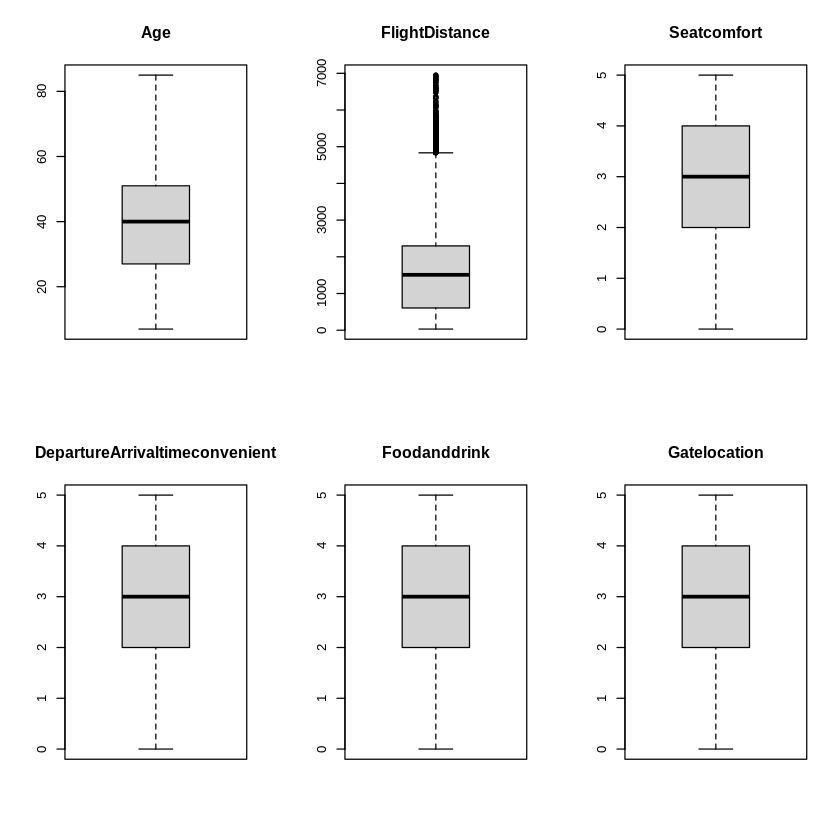

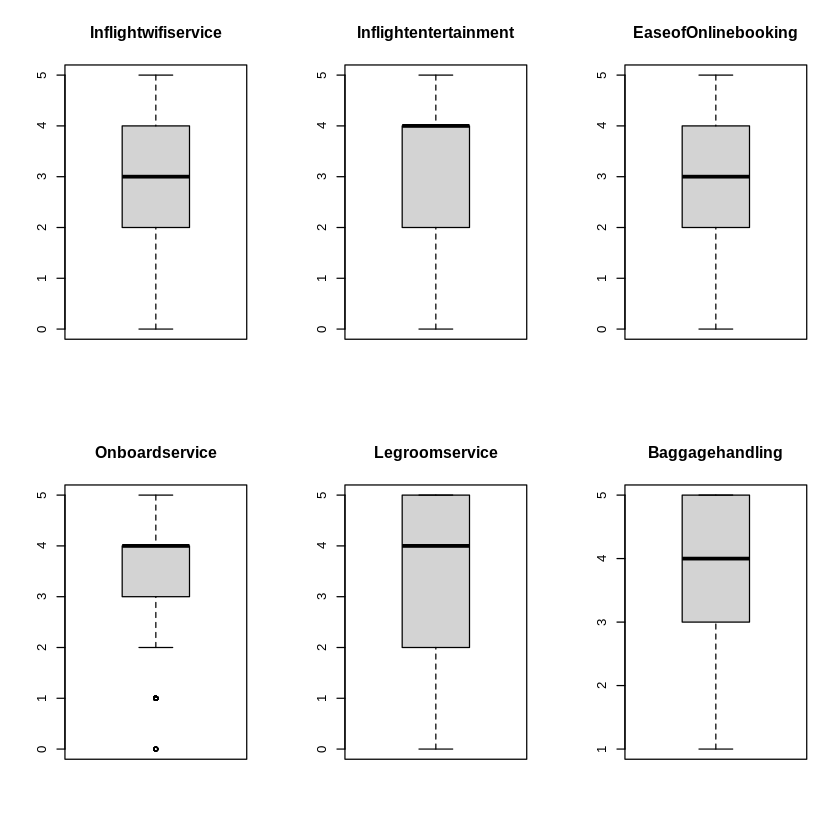

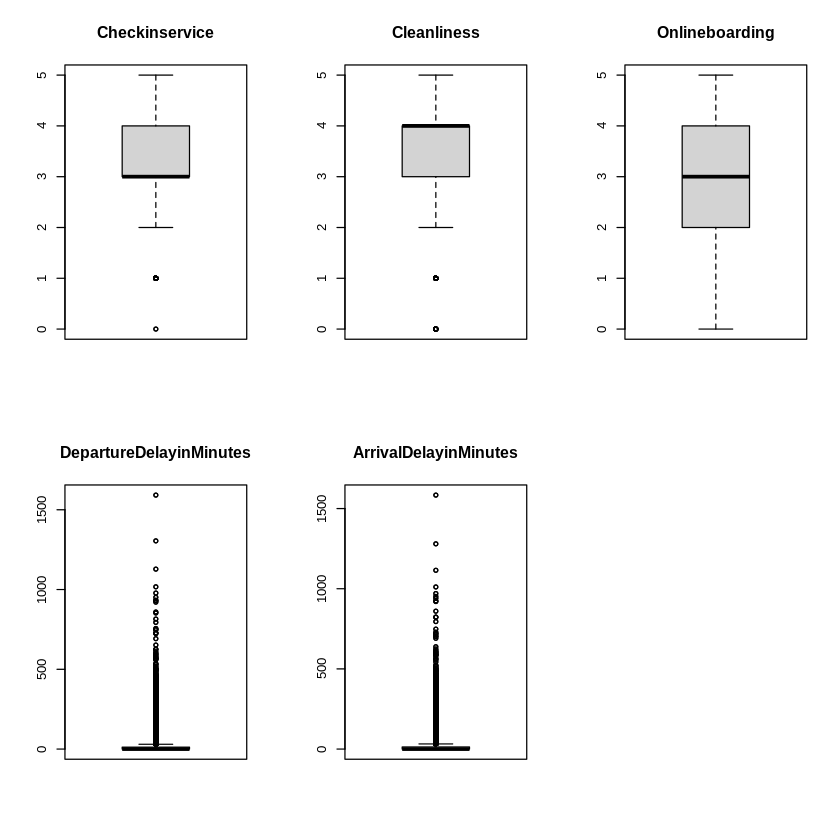

In [12]:
# Box plot
par(mfrow=c(2,3))

for (name in numeric_fields){
    
    boxplot(dataset[,name], horizontal=FALSE, main=name)
}

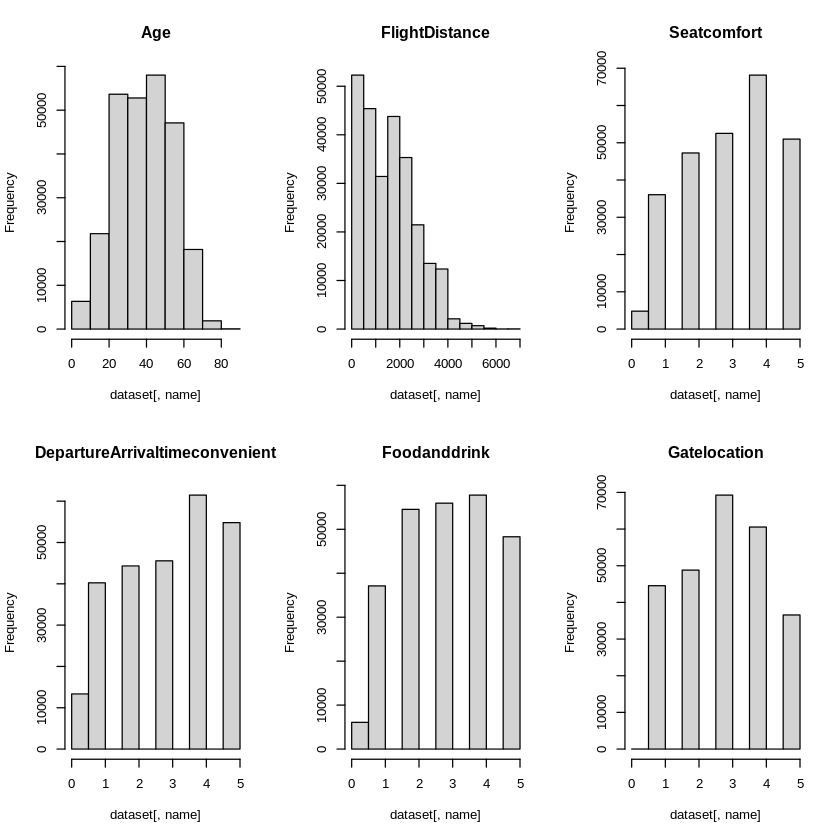

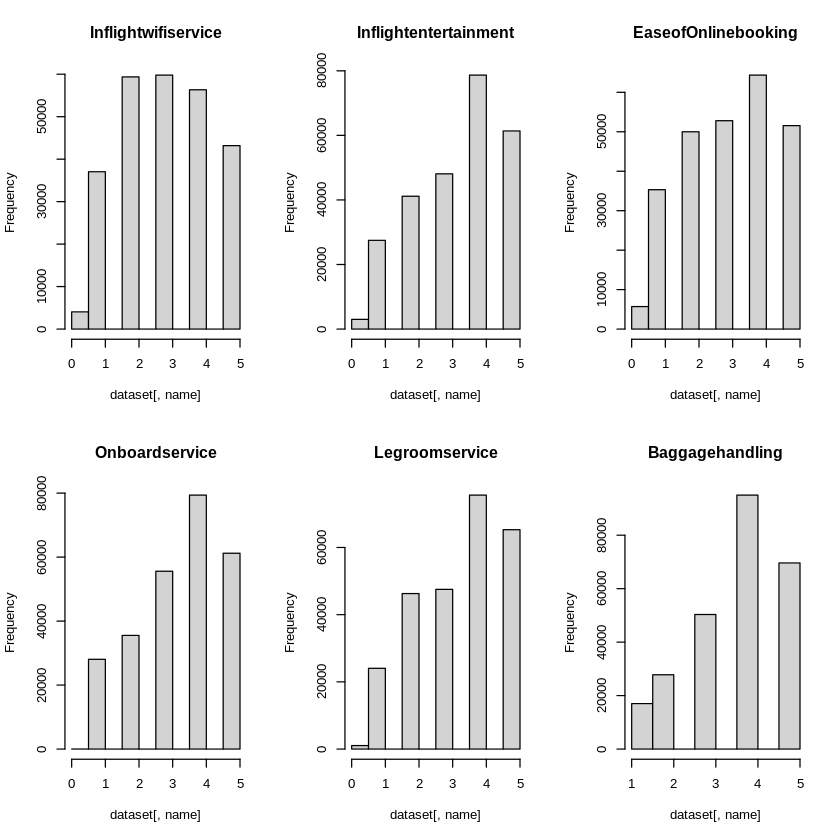

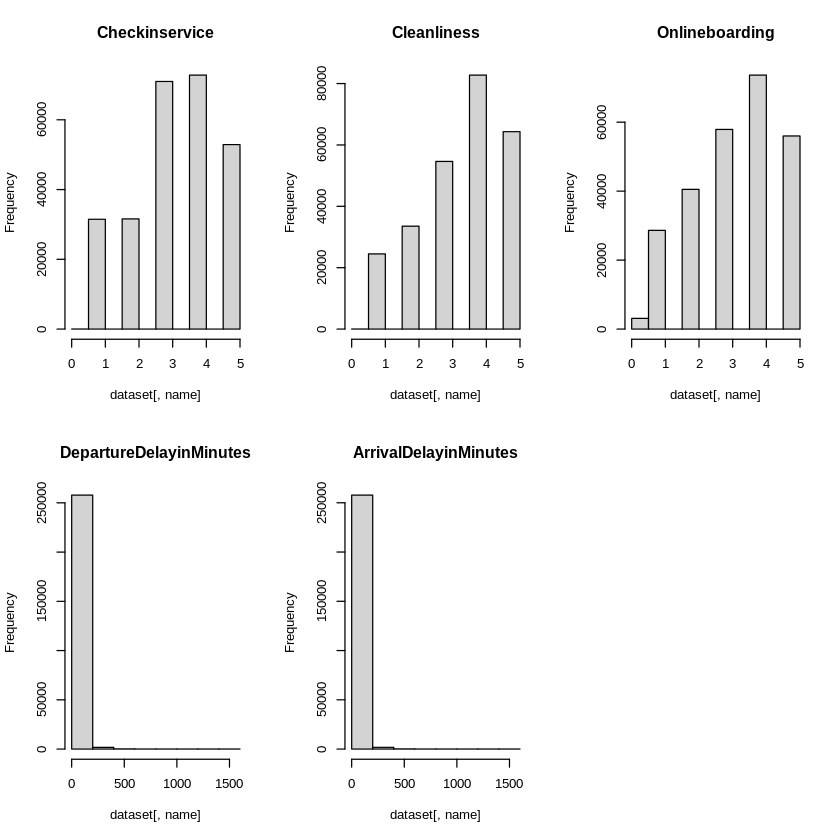

In [14]:
par(mfrow=c(2,3))
for (name in numeric_fields){
    
    hist(dataset[,name], main=name,breaks=10)
}

## Visualize Symbolic Values

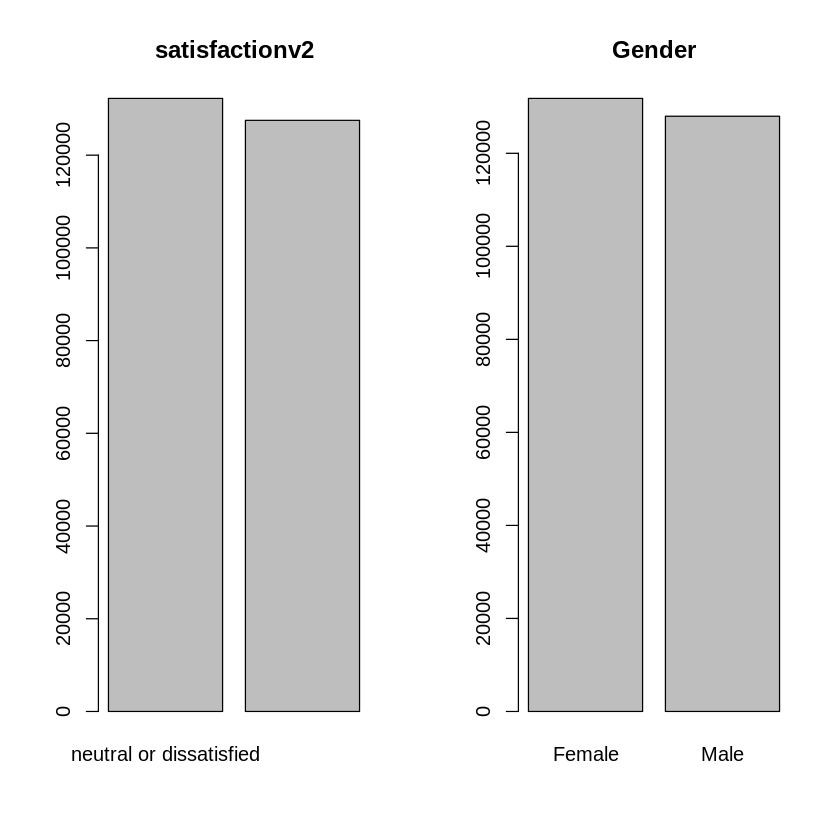

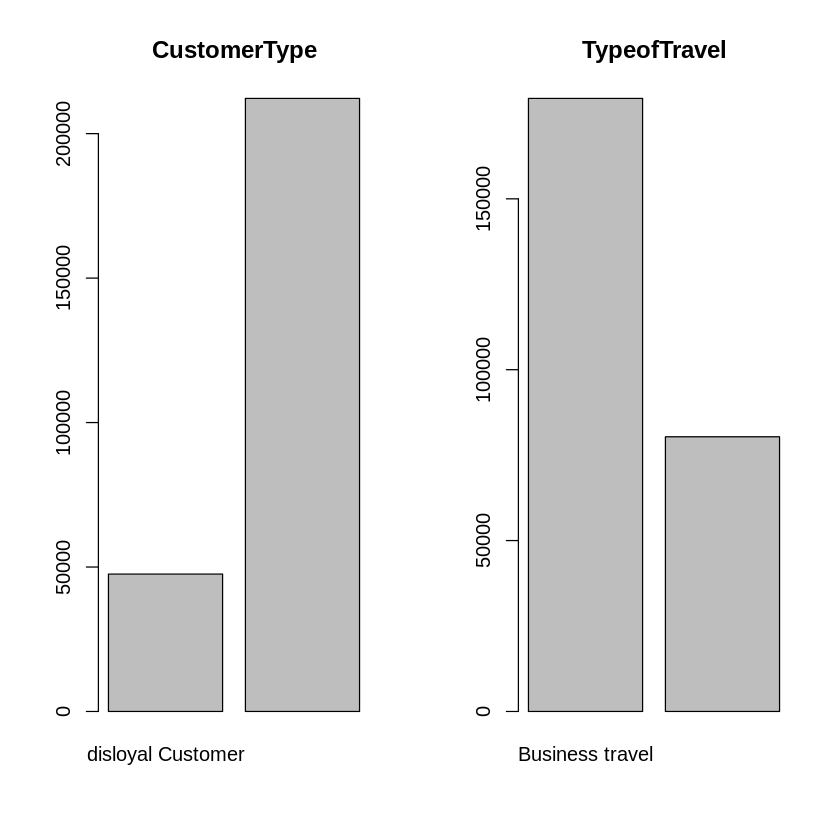

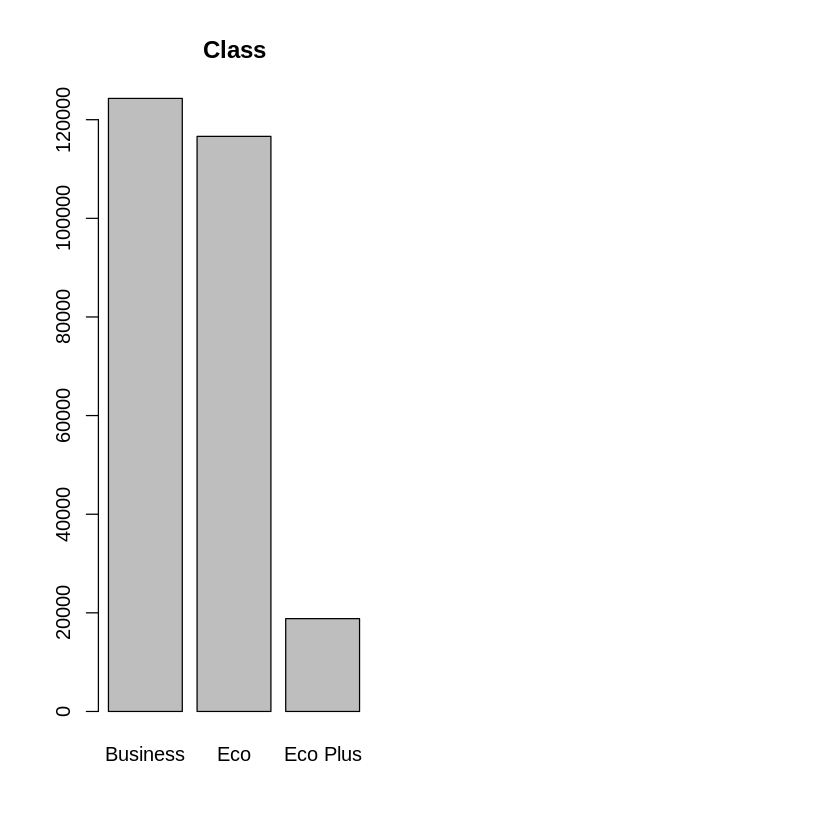

In [16]:
par(mfrow=c(1,2),pty = "m")
for (name in symbolic_fields){
    
counts <- table(dataset[,name])
barplot(counts, main=name,)  
}


                         Class
satisfactionv2            Business   Eco Eco Plus
  neutral or dissatisfied    37059 82702    12484
  satisfied                  87261 33916     6338

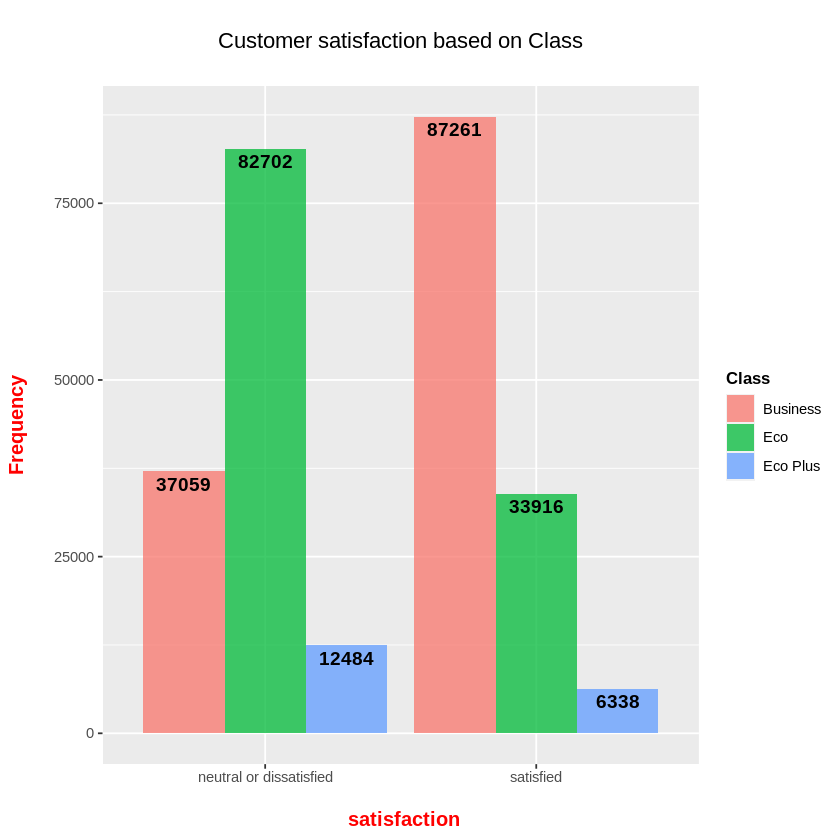

In [21]:
library("ggplot2")
sat_class = dataset[,c('satisfactionv2','Class')]
table(sat_class)
results <- data.frame(table(sat_class))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Class)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Class \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         Gender
satisfactionv2            Female  Male
  neutral or dissatisfied  60601 71644
  satisfied                71197 56318

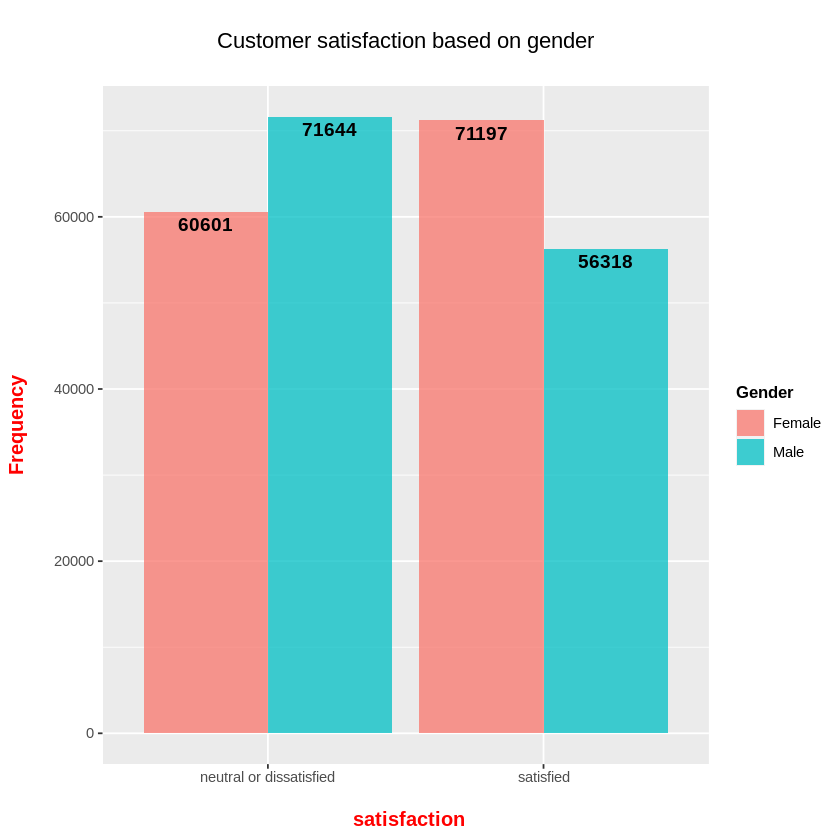

In [23]:
library("ggplot2")
sat_gender = dataset[,c('satisfactionv2','Gender')]
table(sat_gender)
results <- data.frame(table(sat_gender))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gender)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on gender \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         CustomerType
satisfactionv2            disloyal Customer Loyal Customer
  neutral or dissatisfied             36160          96085
  satisfied                           11400         116115

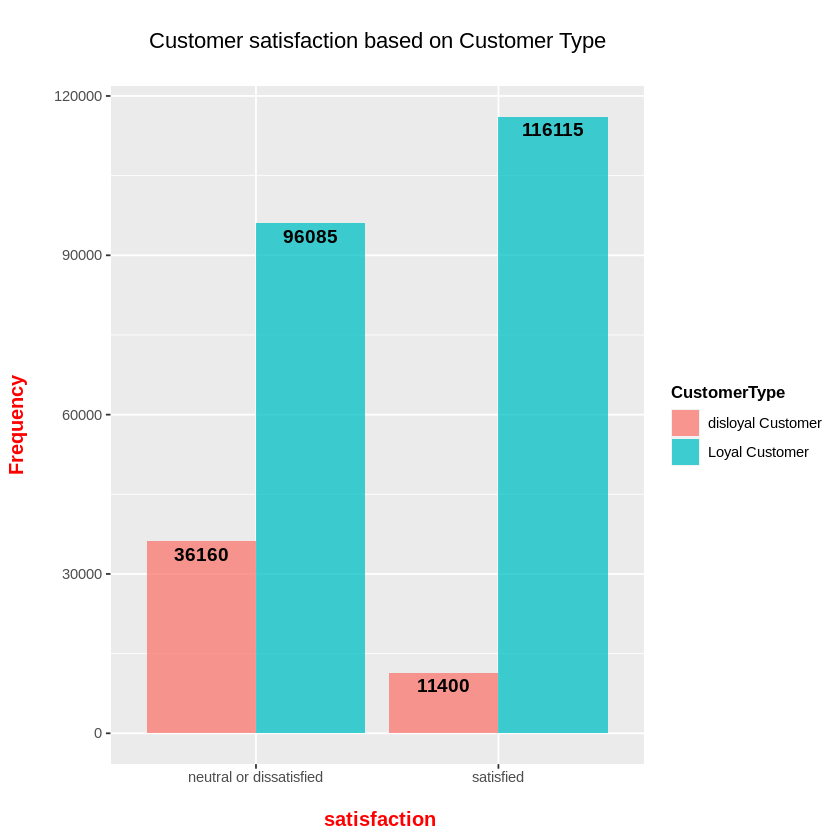

In [25]:

sat_type = dataset[,c('satisfactionv2','CustomerType')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = CustomerType)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Customer Type \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         TypeofTravel
satisfactionv2            Business travel Personal Travel
  neutral or dissatisfied           74674           57571
  satisfied                        104712           22803

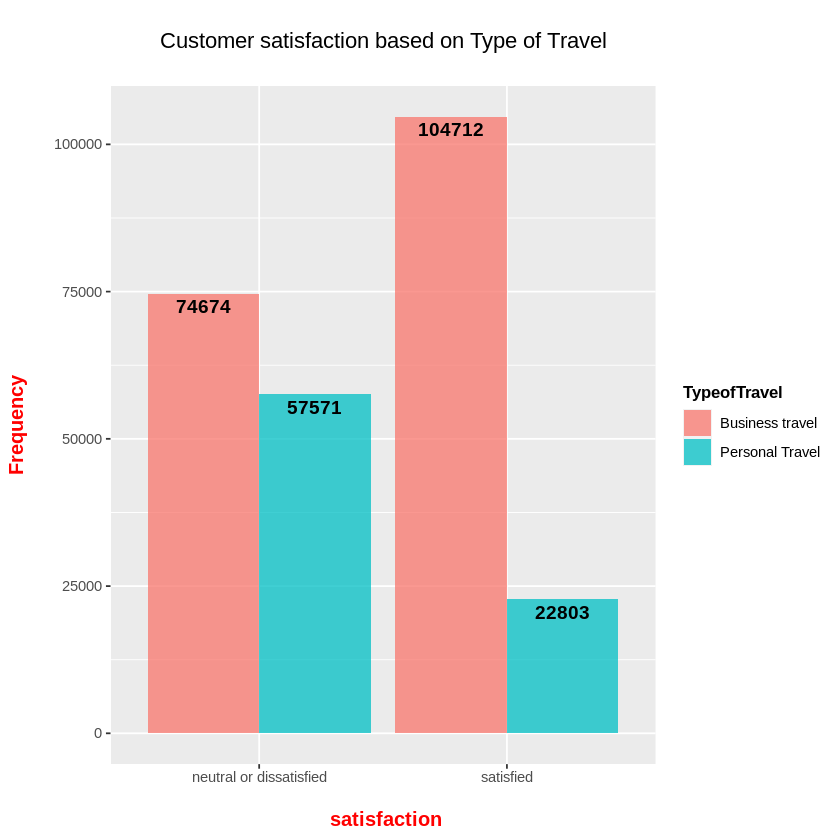

In [26]:
sat_type = dataset[,c('satisfactionv2','TypeofTravel')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =TypeofTravel)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Type of Travel \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

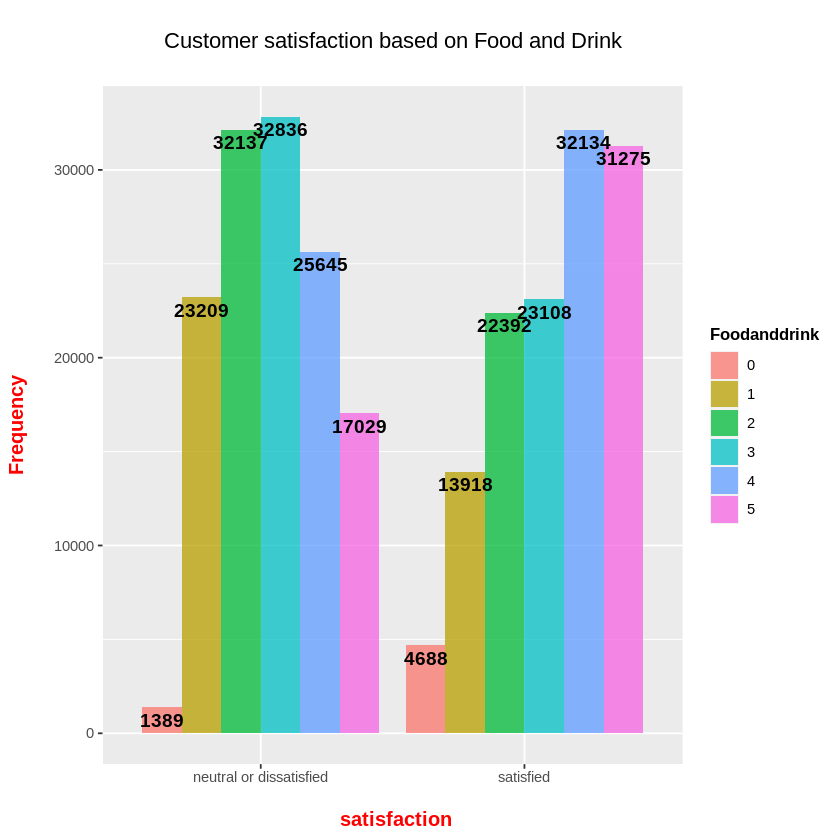

In [27]:
# par(mfrow=c(1,2),pty = "m")
# for (name in sat_cols){

#     print(name)

# temp_df<-rbind(combined_data[,'satisfaction'],combined_data[,name])
# print(table(temp_df))
# #counts <- table(combined_data[,name])
#     #print(counts)
# #barplot(counts, main=name,)  
# }

temp_df<-cbind(dataset[,c('satisfactionv2','Foodanddrink')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Foodanddrink)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Food and Drink \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

[1] "Inflightwifiservice"            "DepartureArrivaltimeconvenient"
 [3] "EaseofOnlinebooking"            "Gatelocation"                  
 [5] "Foodanddrink"                   "Onlineboarding"                
 [7] "Seatcomfort"                    "Inflightentertainment"         
 [9] "Onboardservice"                 "Legroomservice"                
[11] "Baggagehandling"                "Checkinservice"                
[13] "Cleanliness"

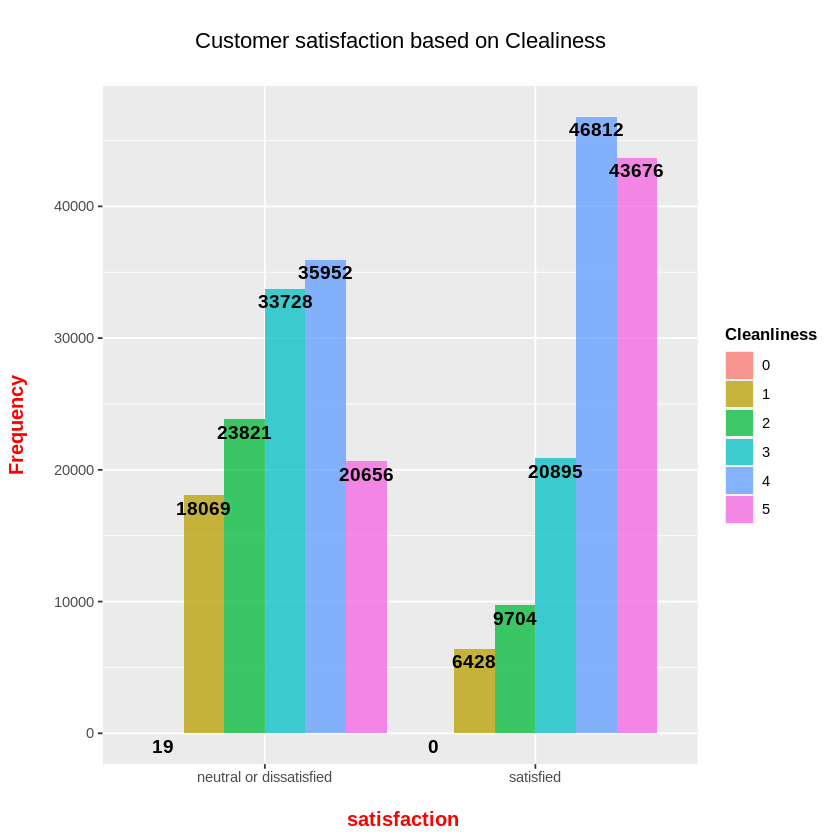

In [28]:
sat_cols
temp_df<-cbind(dataset[,c('satisfactionv2','Cleanliness')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Cleanliness)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Clealiness \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

[1] "Inflightwifiservice"            "DepartureArrivaltimeconvenient"
 [3] "EaseofOnlinebooking"            "Gatelocation"                  
 [5] "Foodanddrink"                   "Onlineboarding"                
 [7] "Seatcomfort"                    "Inflightentertainment"         
 [9] "Onboardservice"                 "Legroomservice"                
[11] "Baggagehandling"                "Checkinservice"                
[13] "Cleanliness"

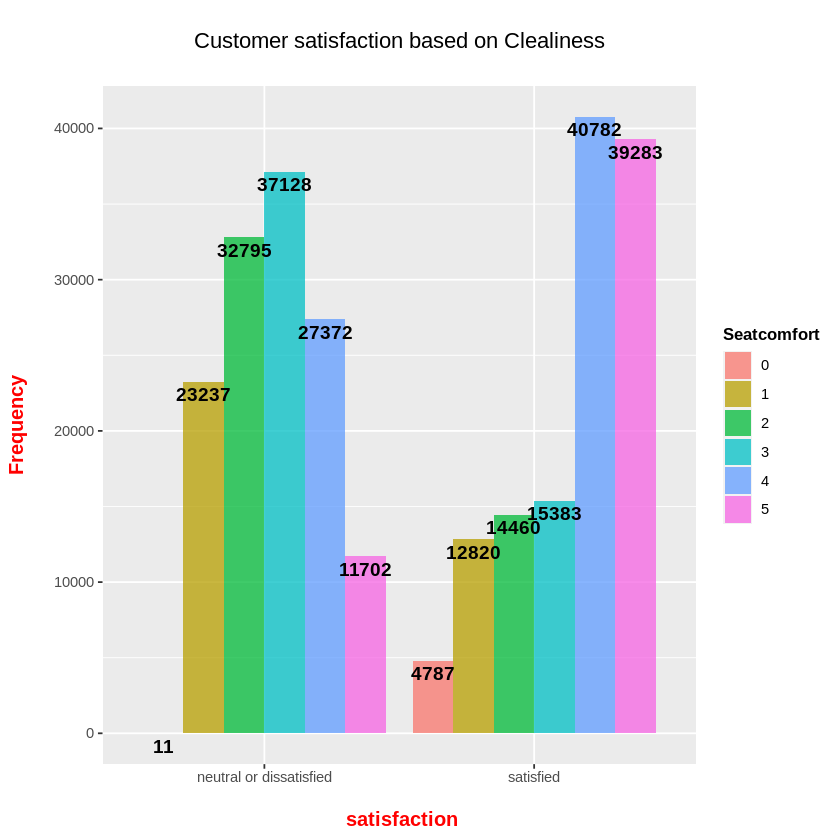

In [29]:
sat_cols
temp_df<-cbind(dataset[,c('satisfactionv2','Seatcomfort')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Seatcomfort)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Clealiness \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

# Data Preparation 

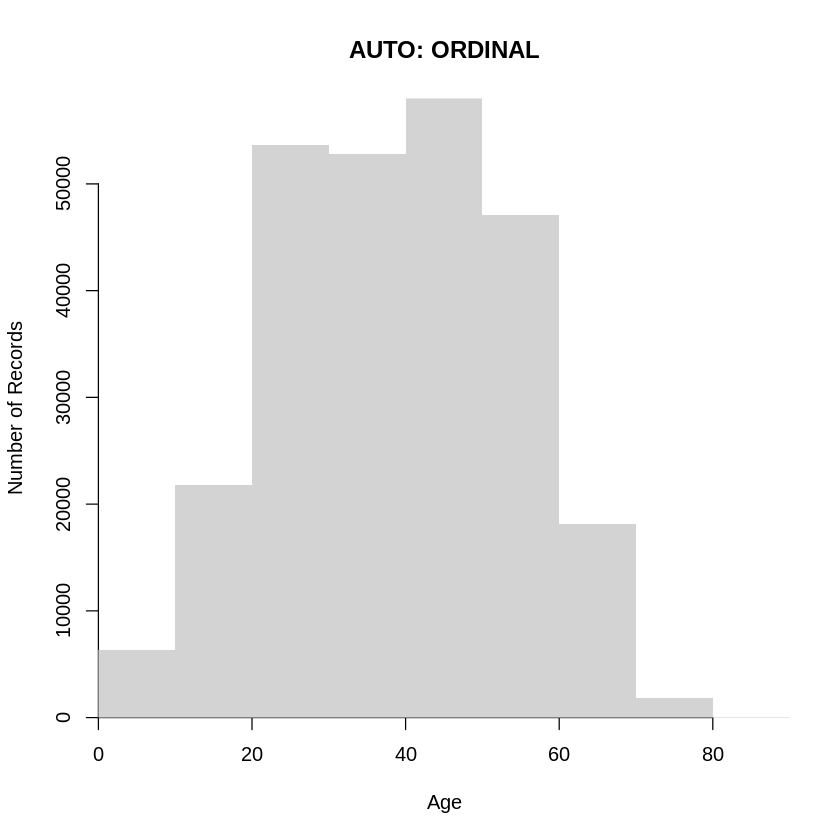

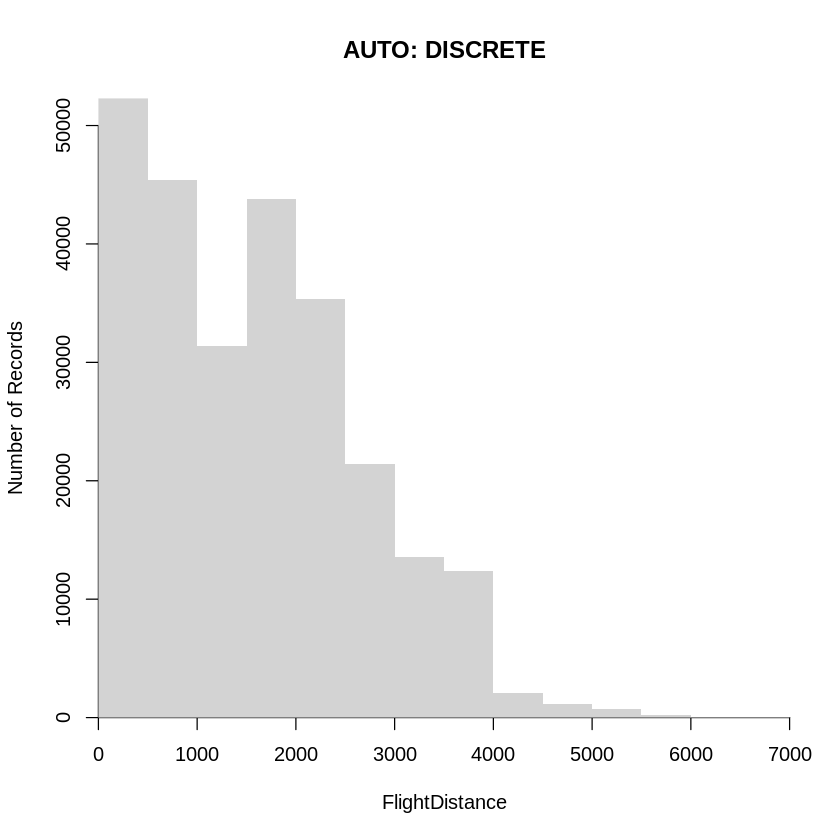

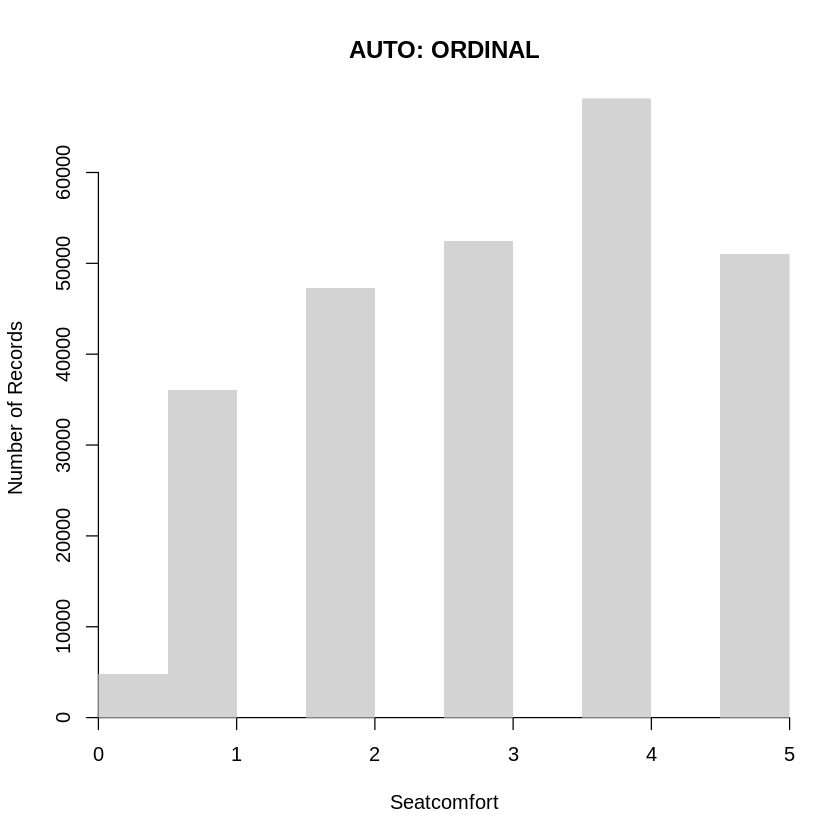

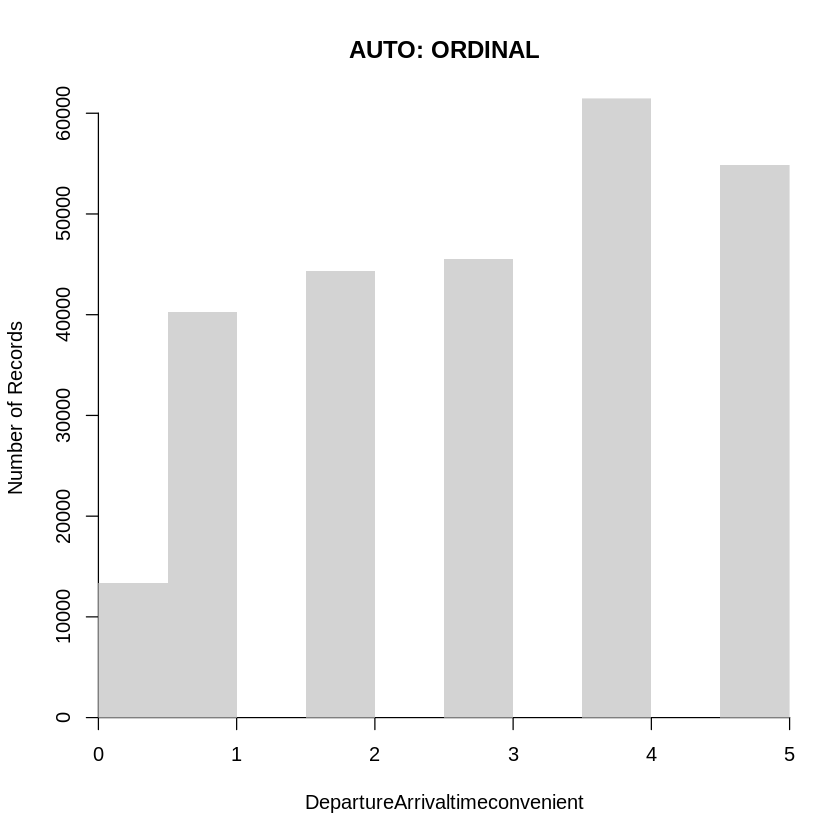

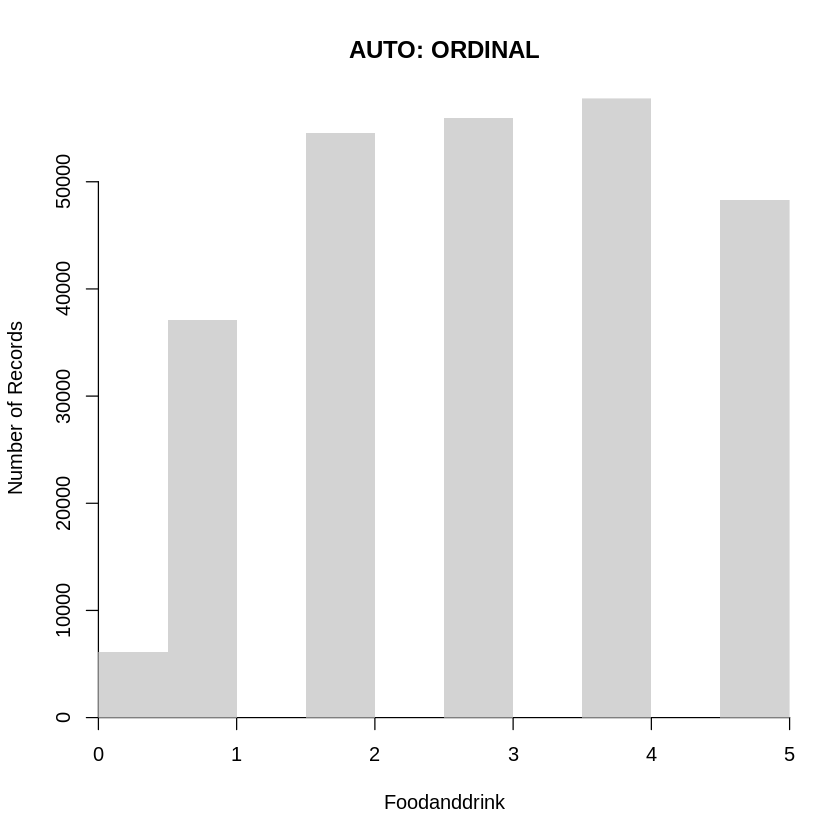

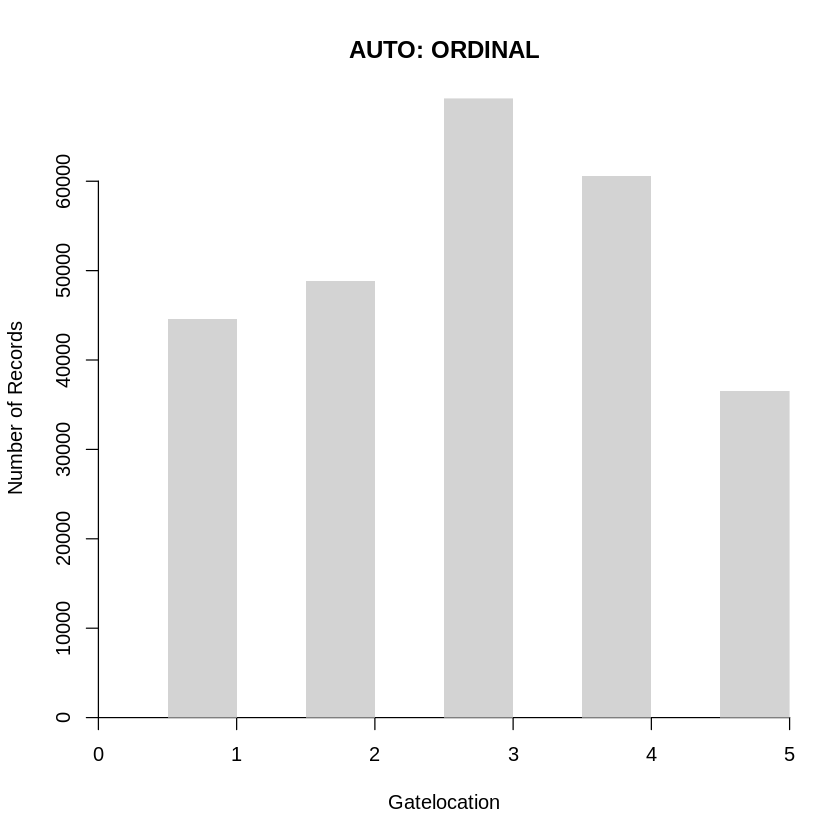

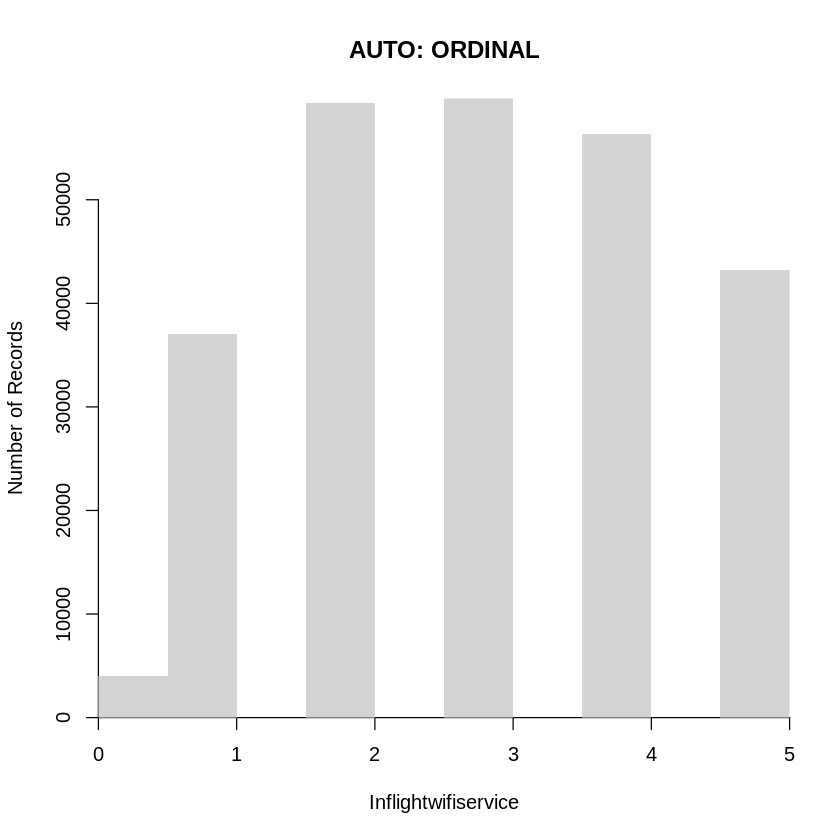

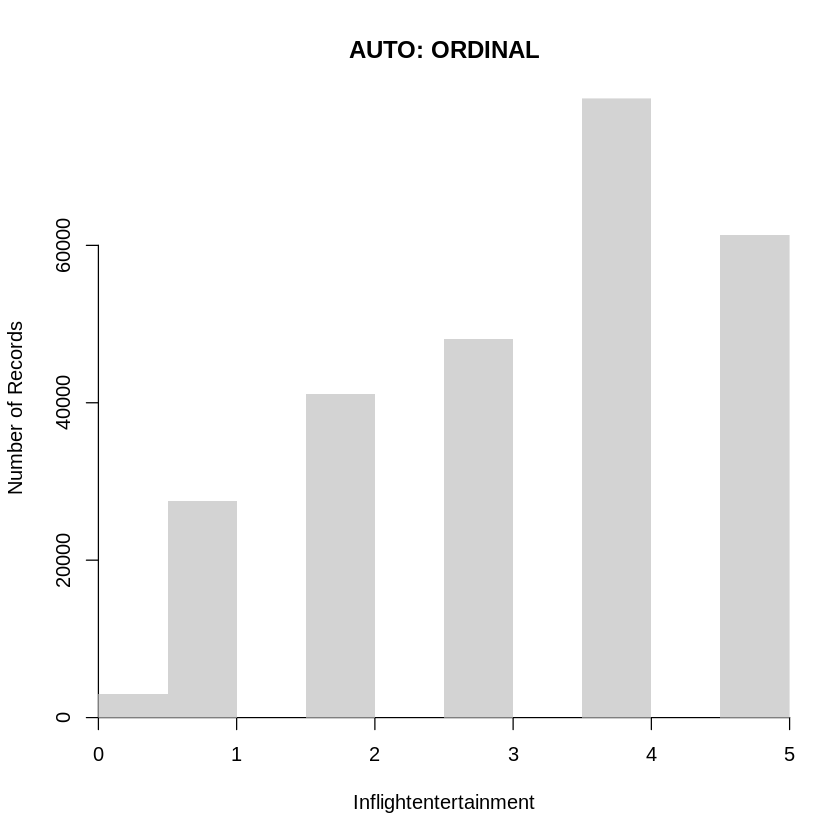

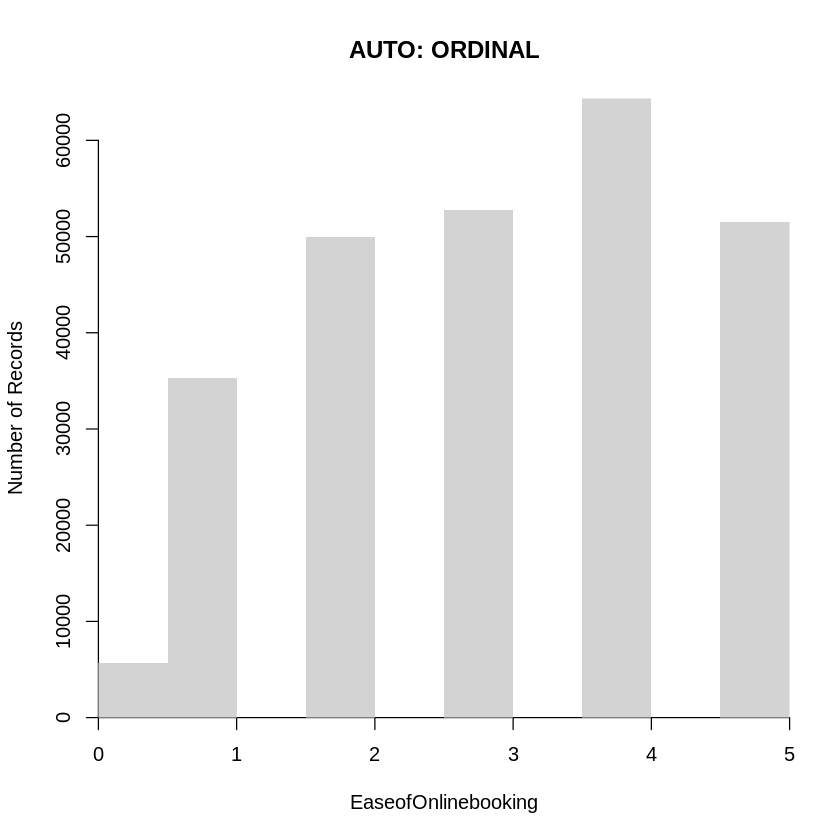

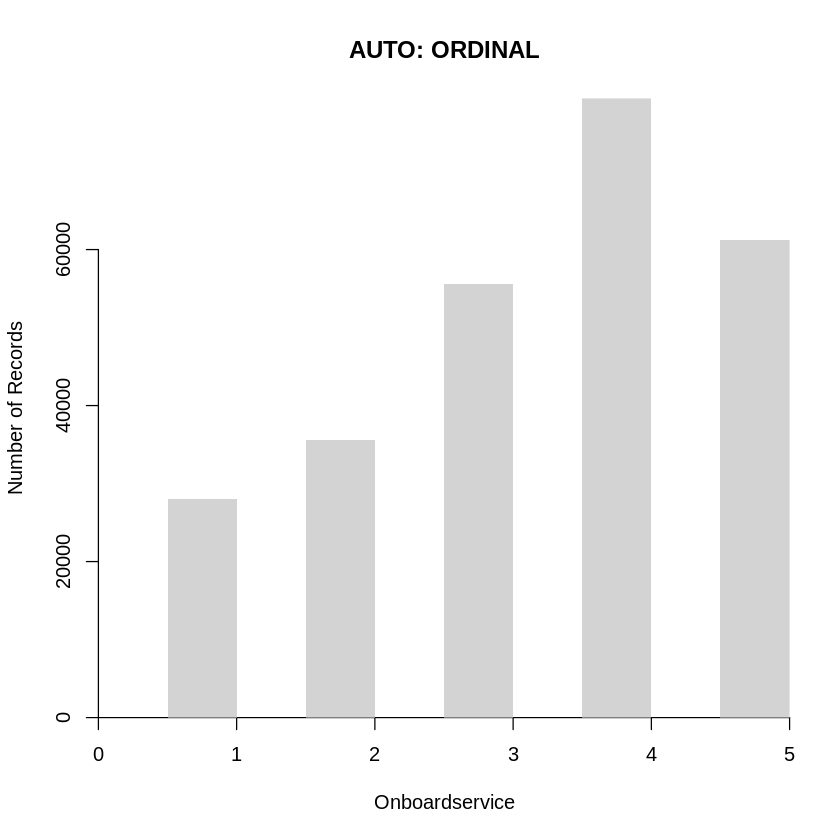

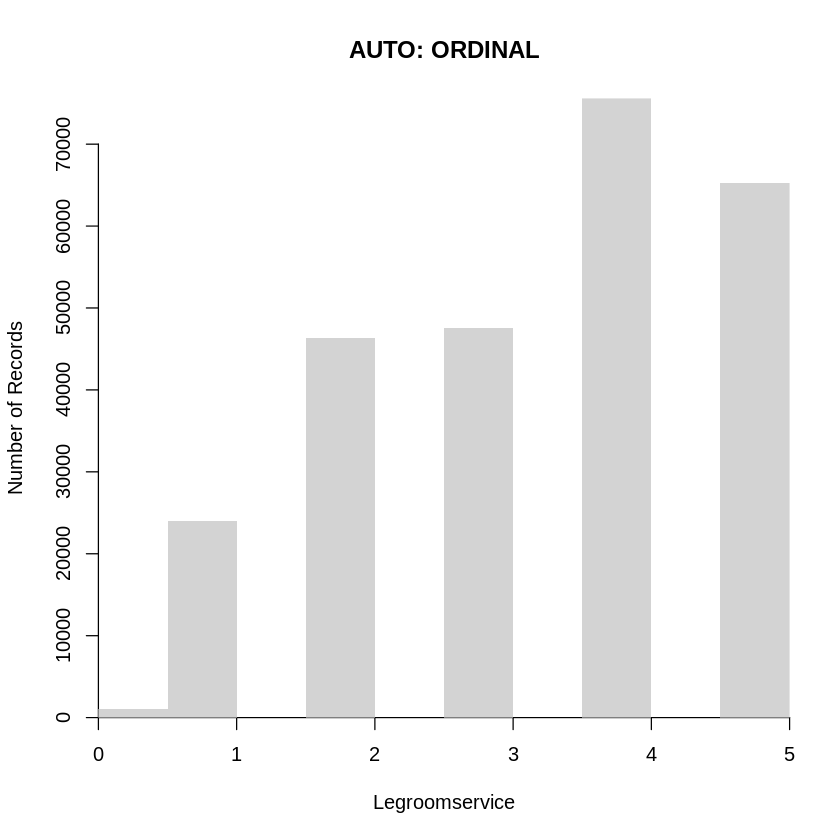

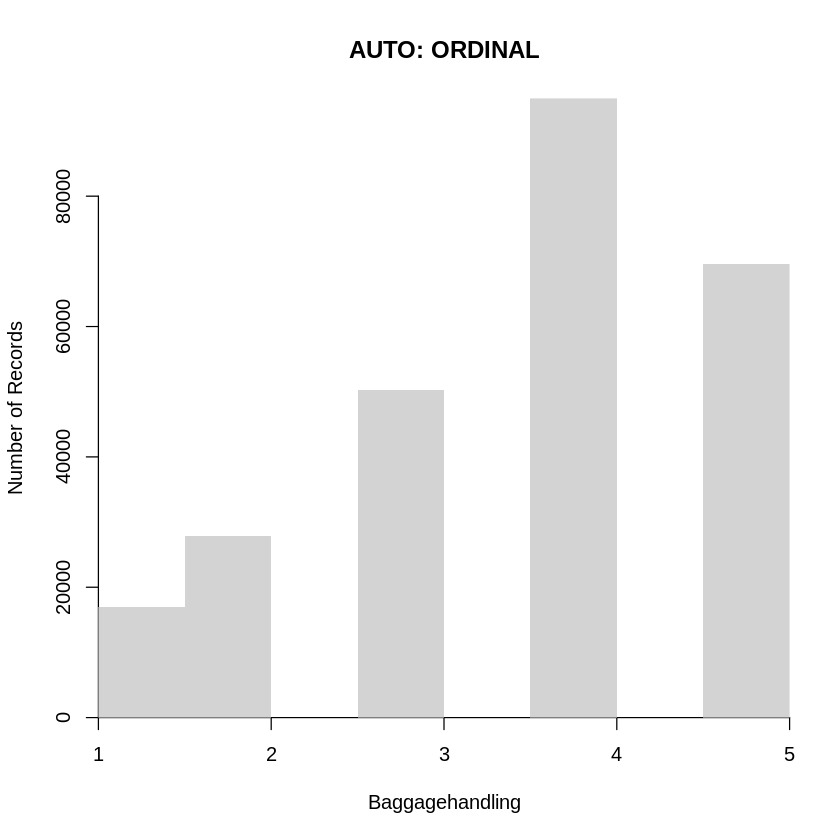

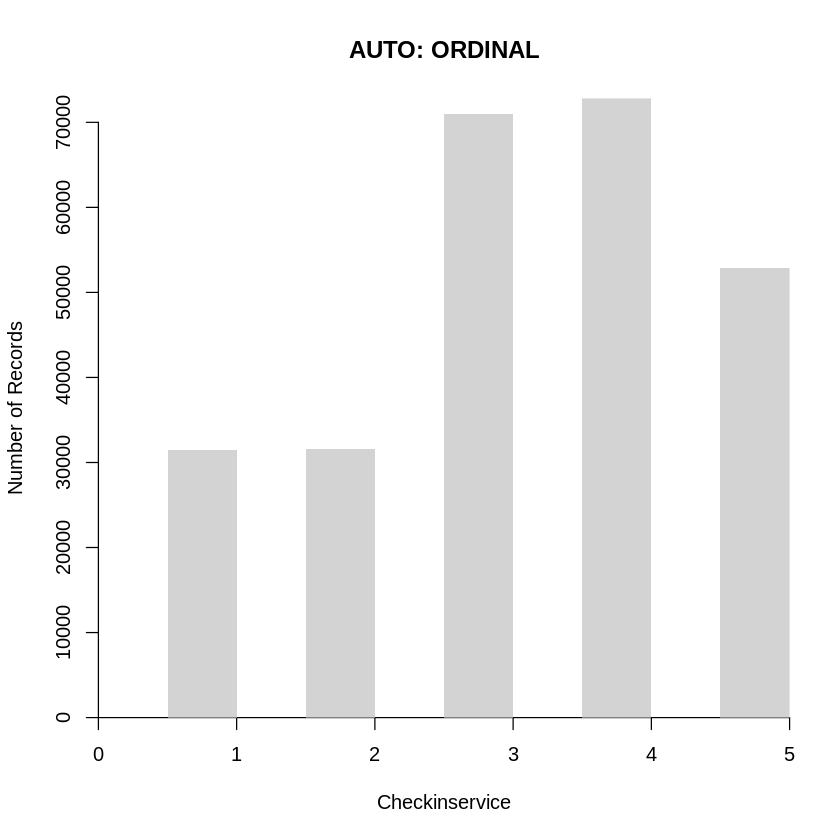

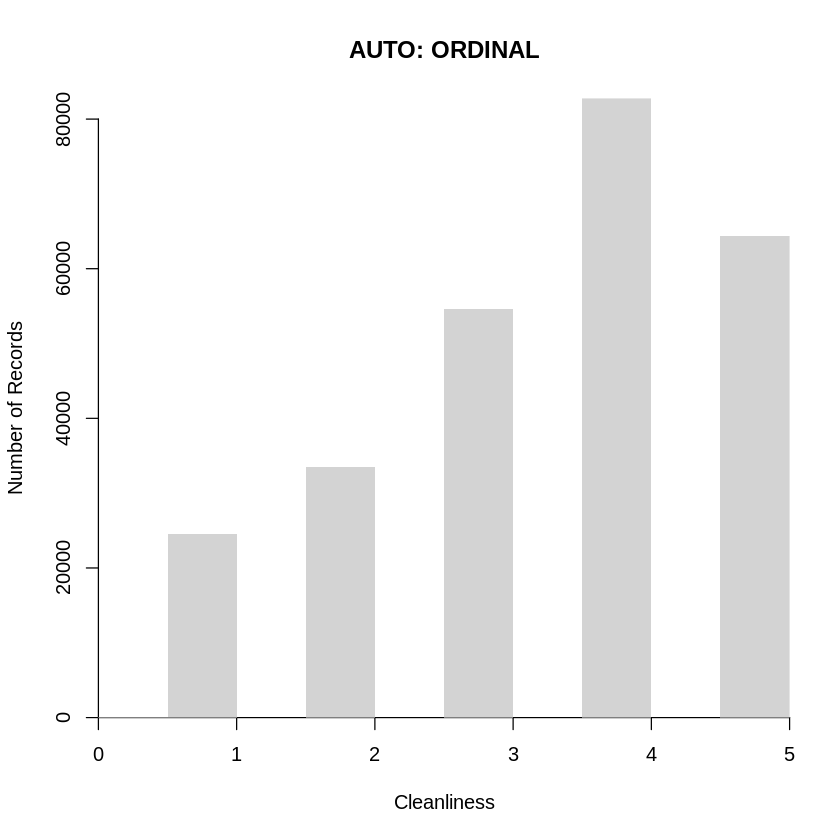

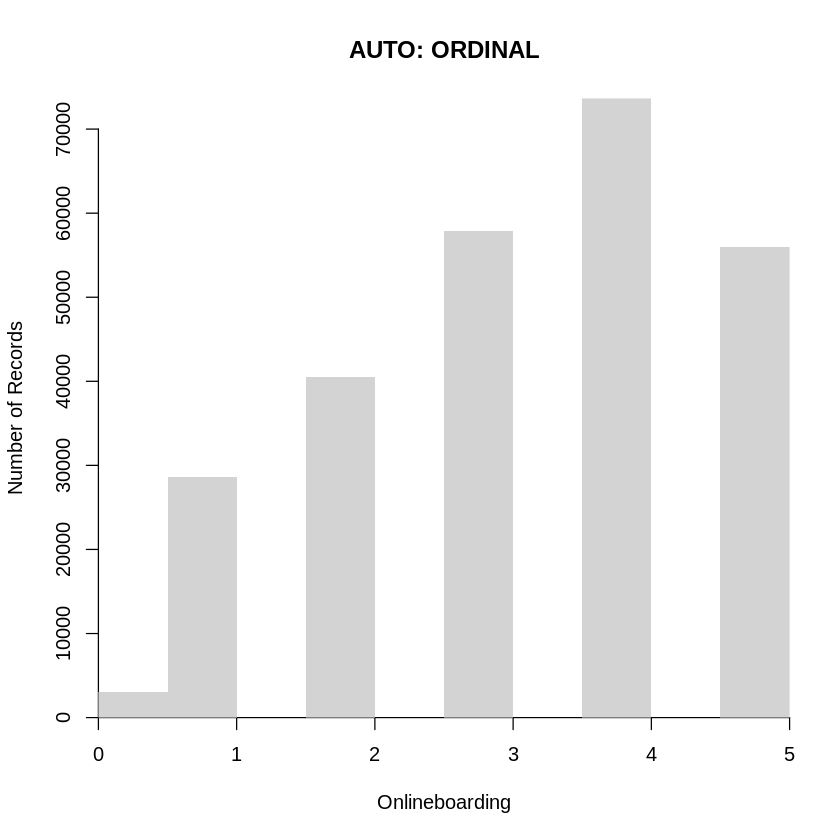

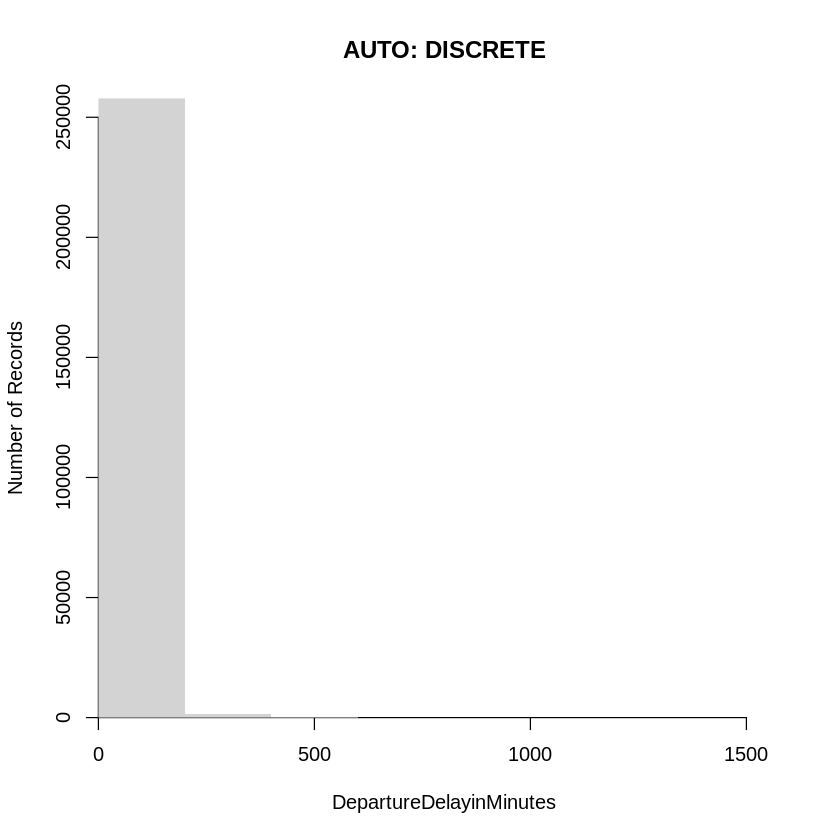

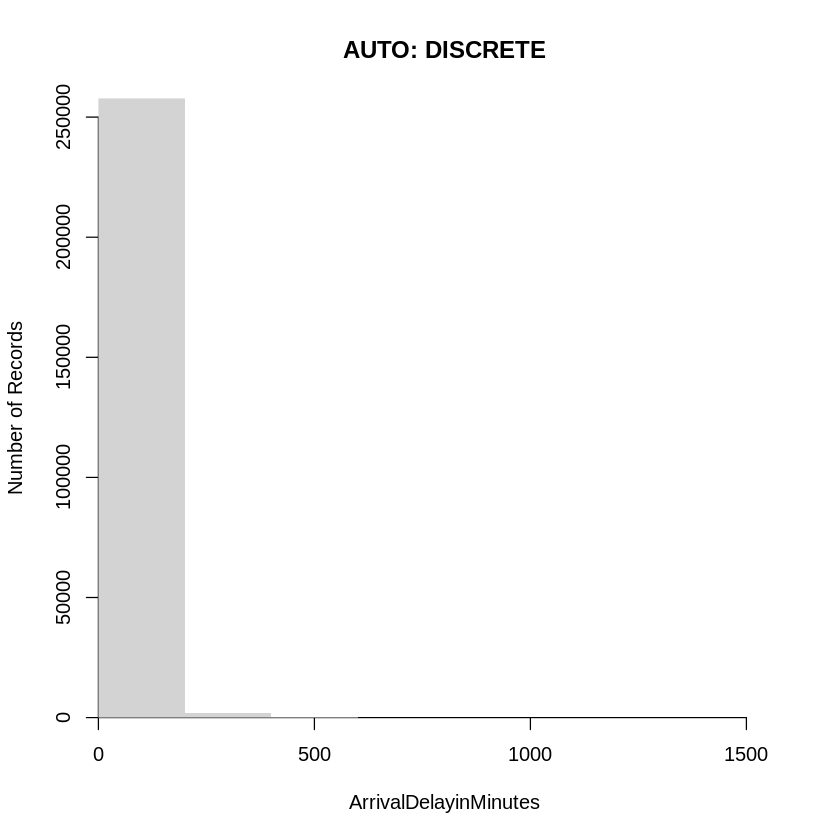

In [31]:
DISCRETE_BINS = 5
field_types_ord_dis<-NPREPROCESSING_discreteNumeric(dataset=dataset,field_types=field_types, cutoff=DISCRETE_BINS)

In [33]:

results<-data.frame(field=names(dataset),initial=field_types,types1=field_types_ord_dis)
print(formattable::formattable(results))

results

field,initial,types1
<chr>,<chr>,<chr>
satisfactionv2,SYMBOLIC,SYMBOLIC
Gender,SYMBOLIC,SYMBOLIC
CustomerType,SYMBOLIC,SYMBOLIC
Age,NUMERIC,ORDINAL
TypeofTravel,SYMBOLIC,SYMBOLIC
Class,SYMBOLIC,SYMBOLIC
FlightDistance,NUMERIC,DISCRETE
Seatcomfort,NUMERIC,ORDINAL
DepartureArrivaltimeconvenient,NUMERIC,ORDINAL


##  Preprocessing Ordinals Fields

In [36]:
# Temporary variable storing dataframe of ordinals fields
ordinals<-dataset[,which(field_types_ord_dis==TYPE_ORDINAL)]
head(ordinals)

,Age,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,65,0,0,0,2,2,4,3,3,0,3,5,3,2
2,47,0,0,0,3,0,2,3,4,4,4,2,3,2
3,15,0,0,0,3,2,0,2,3,3,4,4,4,2
4,60,0,0,0,3,3,4,1,1,0,1,4,1,3
5,70,0,0,0,3,4,3,2,2,0,2,4,2,5
6,30,0,0,0,3,2,0,2,5,4,5,5,4,2


In [60]:
# Max and Min in all ordinals fields before removing outliers

for (name in names(ordinals)){
    
    cols = ordinals[,name]
    
    print(paste(name, ": ","min: ", min(cols), ", max:",max(cols)))
}

[1] "Age :  min:  7 , max: 85"
[1] "FlightDistance :  min:  31 , max: 4983"
[1] "Inflightwifiservice :  min:  0 , max: 5"
[1] "DepartureArrivaltimeconvenient :  min:  0 , max: 5"
[1] "EaseofOnlinebooking :  min:  0 , max: 5"
[1] "Gatelocation :  min:  0 , max: 5"
[1] "Foodanddrink :  min:  0 , max: 5"
[1] "Onlineboarding :  min:  0 , max: 5"
[1] "Seatcomfort :  min:  0 , max: 5"
[1] "Inflightentertainment :  min:  0 , max: 5"
[1] "Onboardservice :  min:  0 , max: 5"
[1] "Legroomservice :  min:  0 , max: 5"
[1] "Baggagehandling :  min:  1 , max: 5"
[1] "Checkinservice :  min:  0 , max: 5"
[1] "Inflightservice :  min:  0 , max: 5"
[1] "Cleanliness :  min:  0 , max: 5"


[1] "Outlier field= Age Records= 1 Replaced with MEAN"


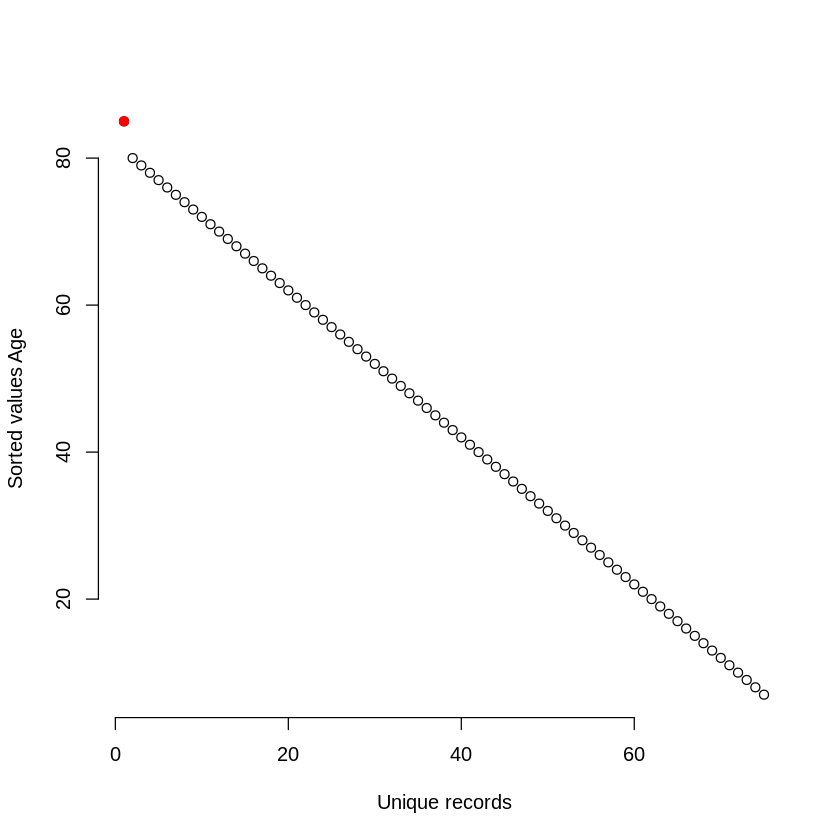

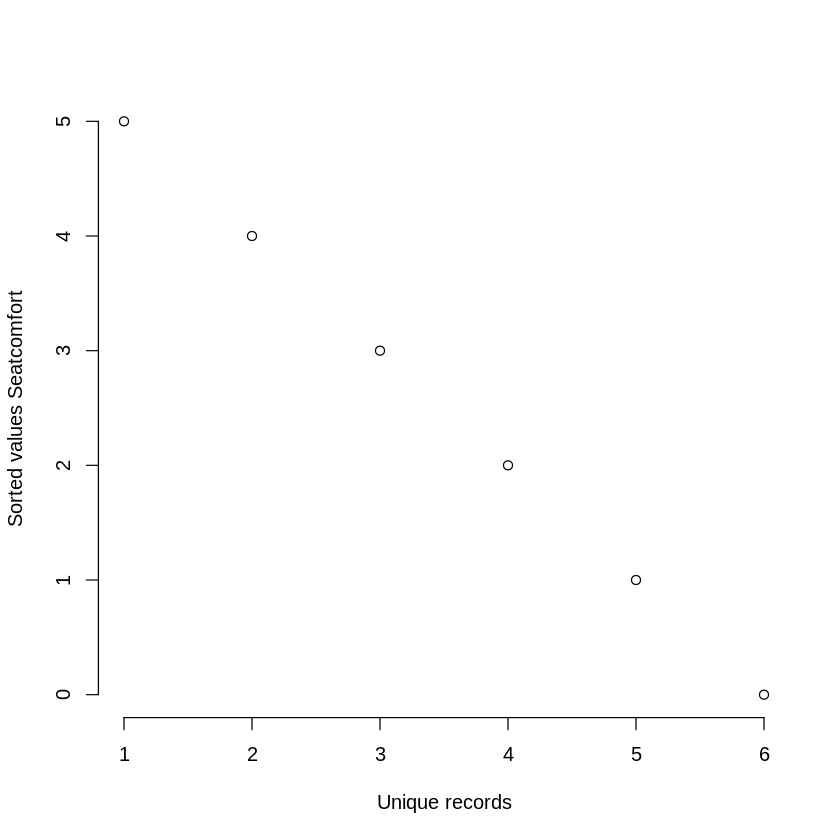

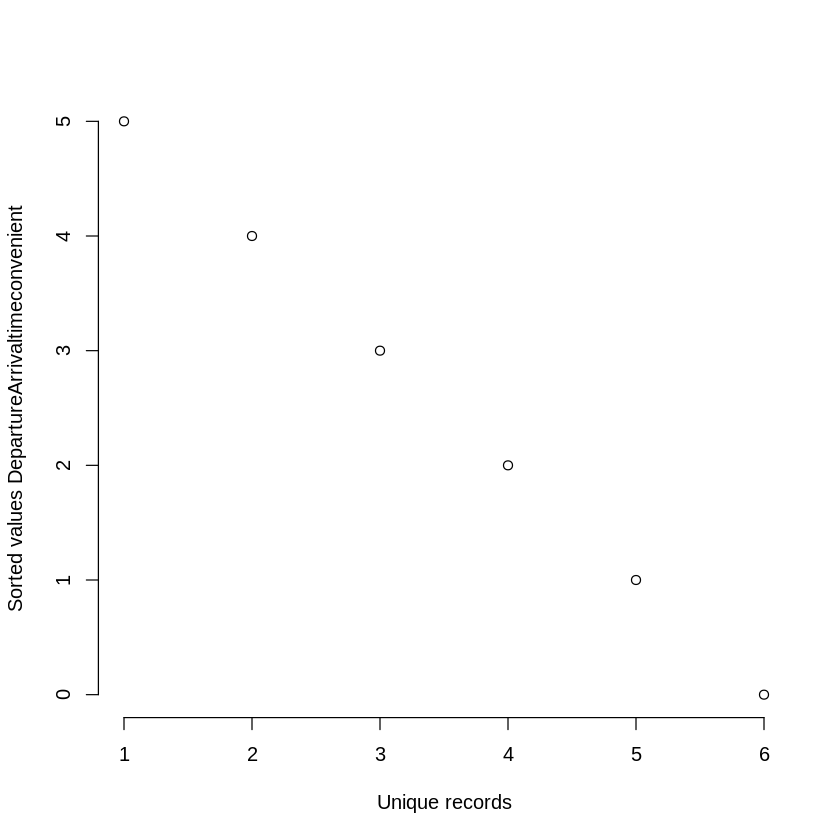

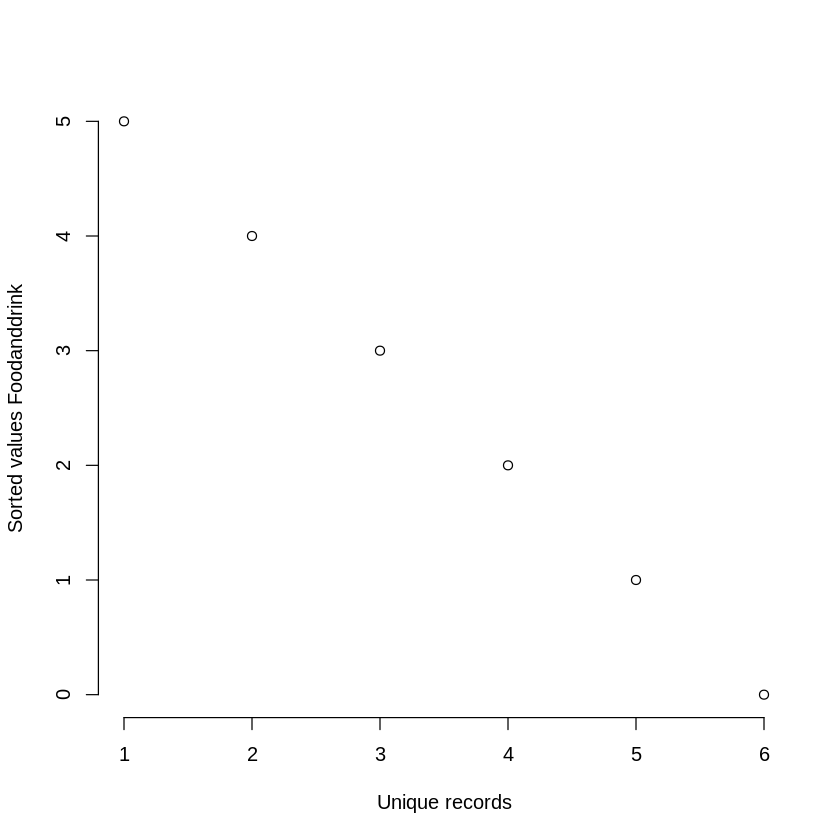

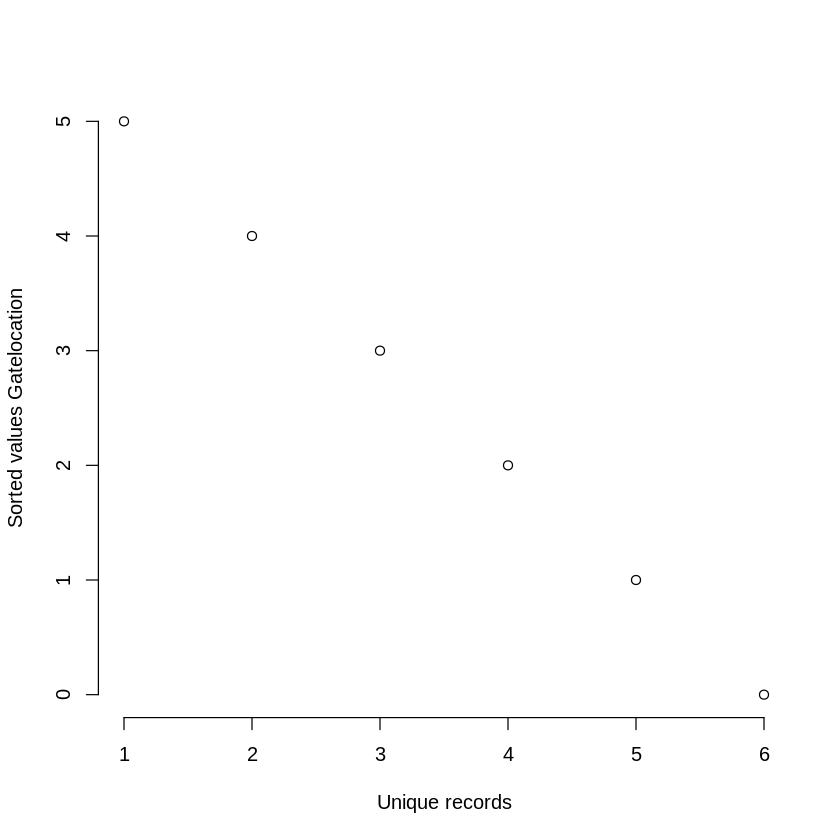

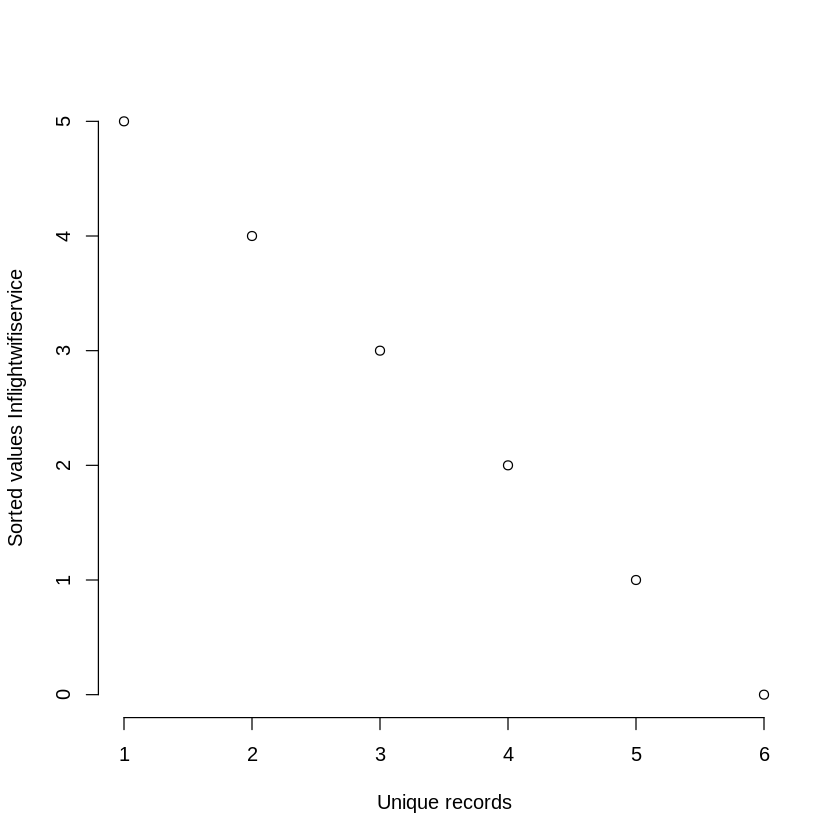

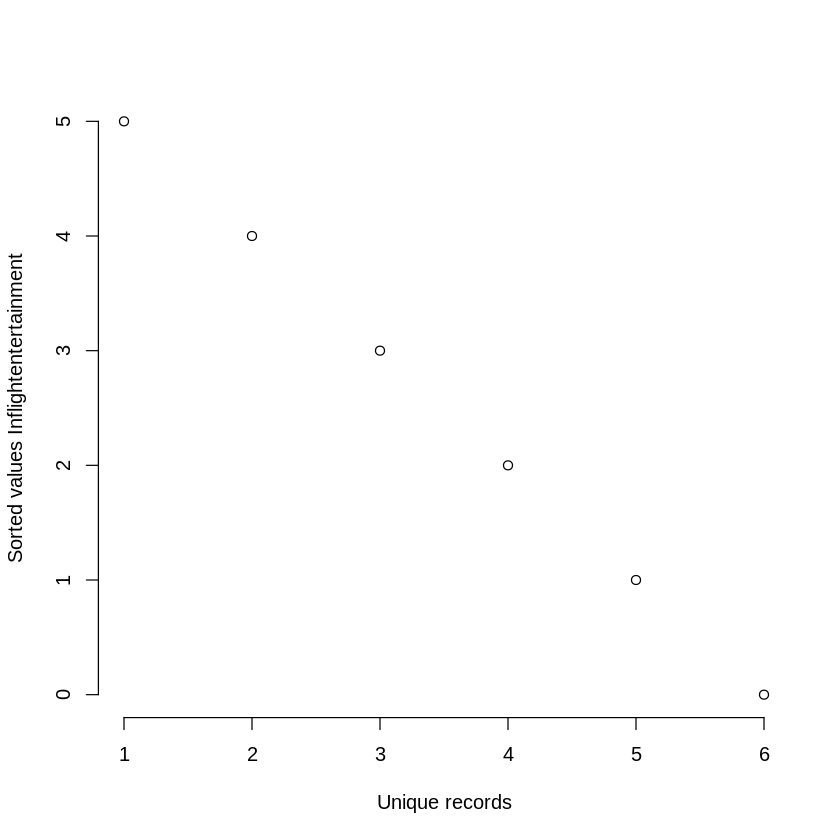

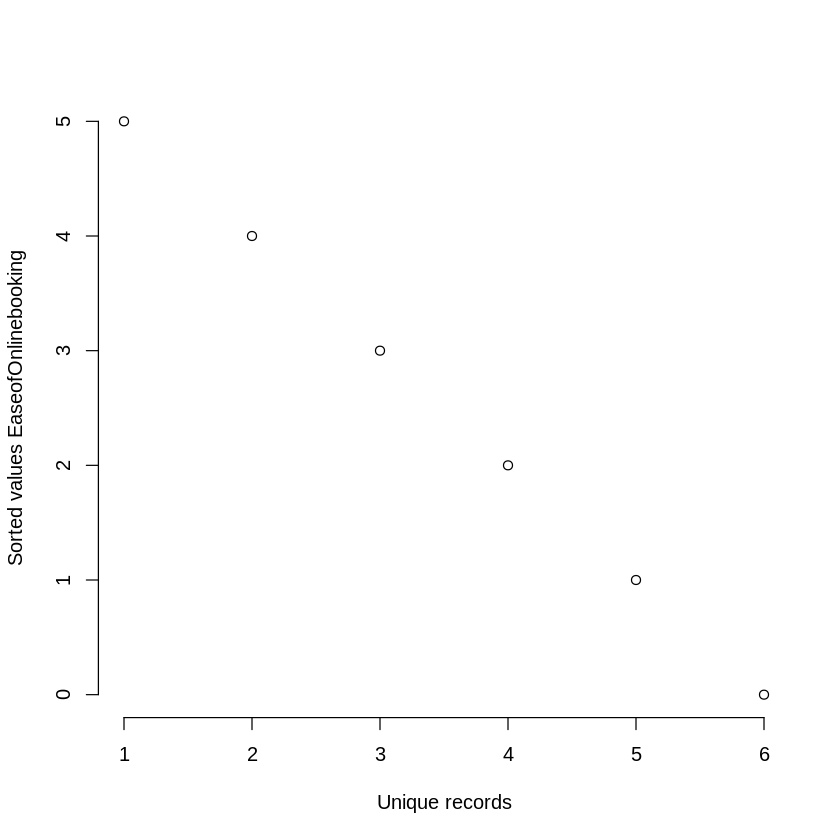

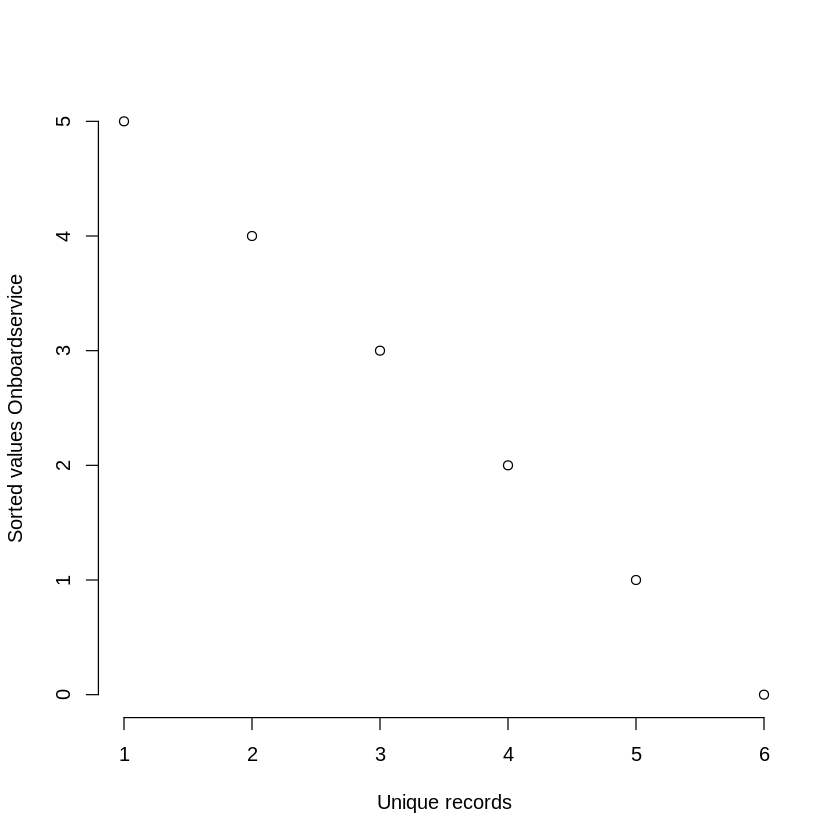

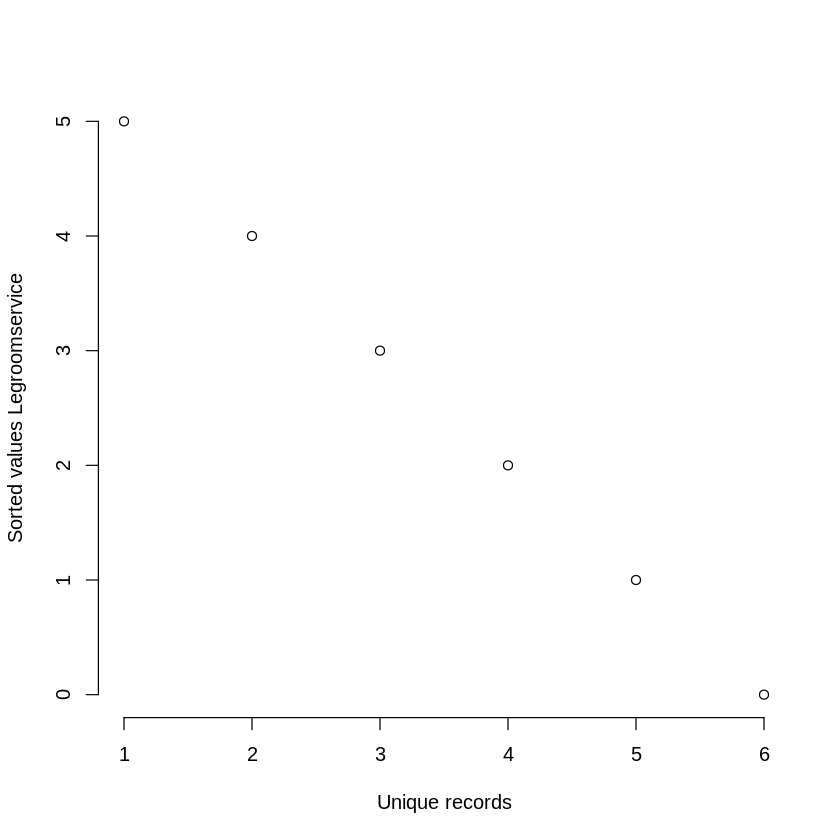

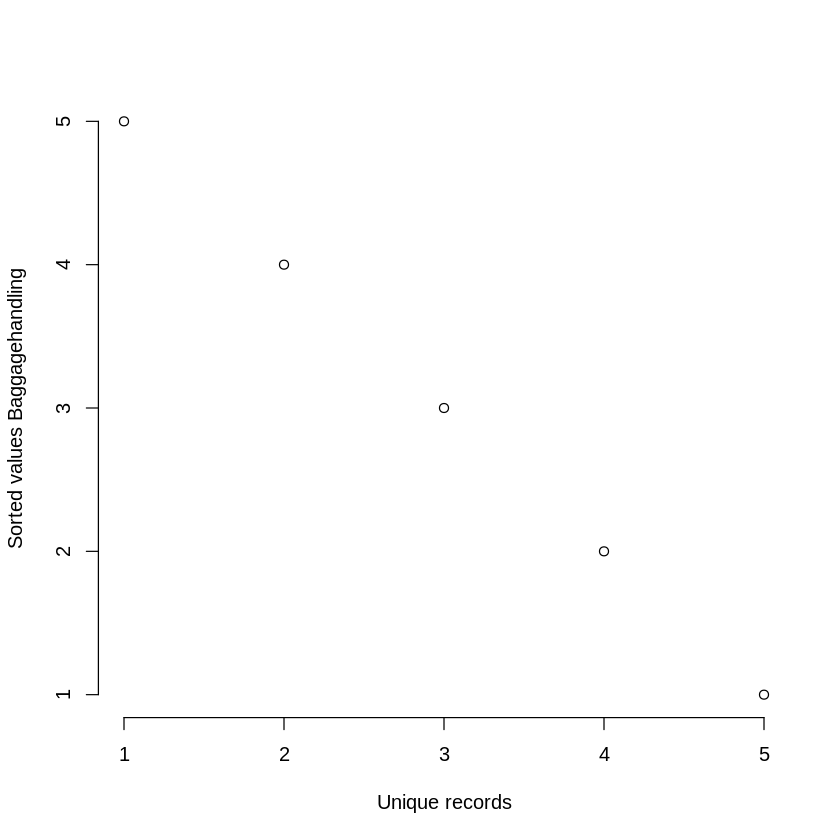

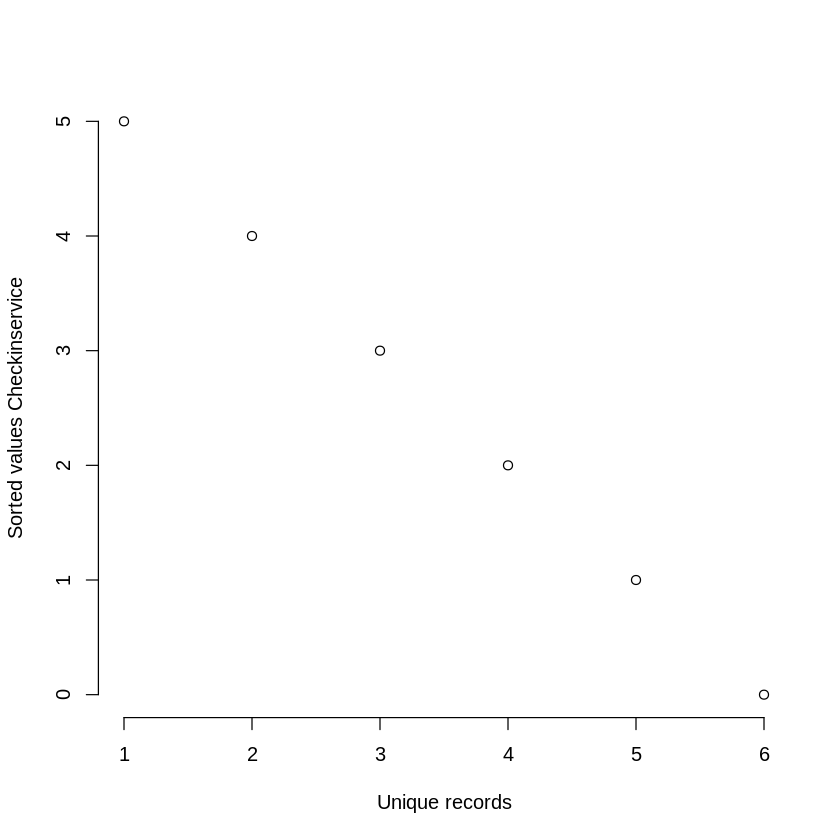

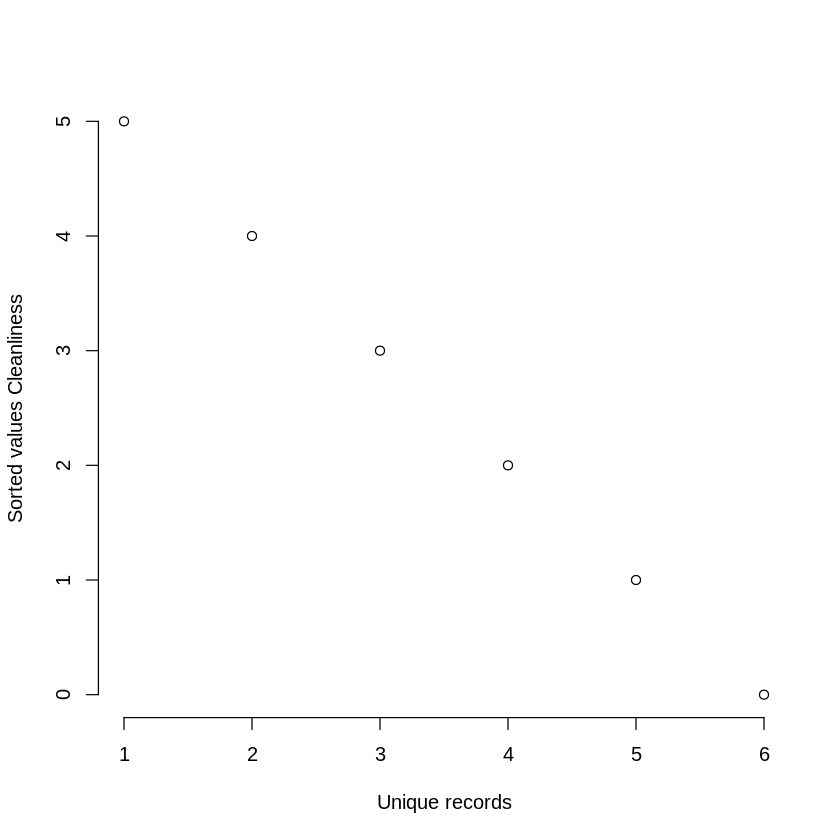

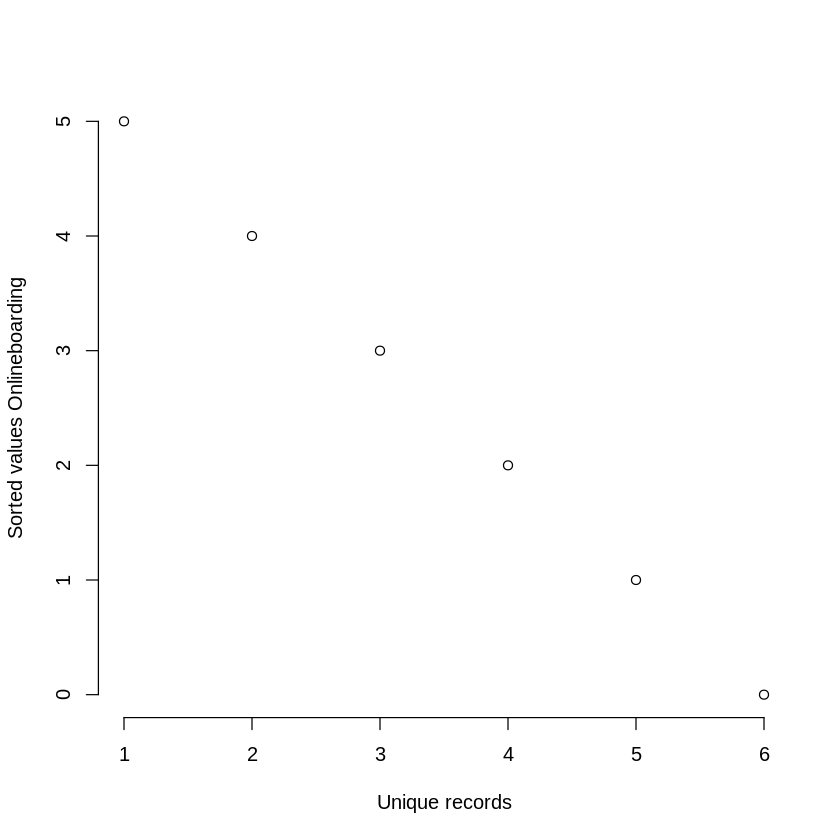

In [37]:
OUTLIER_CONF<- 0.92 # This value is the perfect for removing outlier in this dataset
ordinals<-NPREPROCESSING_outlier(ordinals=ordinals,confidence=OUTLIER_CONF)
# There is only two outlier here that are Flight distance and age 

In [38]:
# Max and Min in all ordinals fields after removing outliers

for (name in names(ordinals)){
    
    cols = ordinals[,name]
    
    print(paste(name, ": ","min: ", min(cols), ", max:",max(cols)))
}

[1] "Age :  min:  7 , max: 80"
[1] "Seatcomfort :  min:  0 , max: 5"
[1] "DepartureArrivaltimeconvenient :  min:  0 , max: 5"
[1] "Foodanddrink :  min:  0 , max: 5"
[1] "Gatelocation :  min:  0 , max: 5"
[1] "Inflightwifiservice :  min:  0 , max: 5"
[1] "Inflightentertainment :  min:  0 , max: 5"
[1] "EaseofOnlinebooking :  min:  0 , max: 5"
[1] "Onboardservice :  min:  0 , max: 5"
[1] "Legroomservice :  min:  0 , max: 5"
[1] "Baggagehandling :  min:  1 , max: 5"
[1] "Checkinservice :  min:  0 , max: 5"
[1] "Cleanliness :  min:  0 , max: 5"
[1] "Onlineboarding :  min:  0 , max: 5"


In [39]:
# transform ordinal value in each colums into z scaled. So, that each 
#zscaled<-as.data.frame(scale(ordinals,center=TRUE, scale=TRUE))

In [40]:
#head(zscaled)

In [41]:
processed_ordinal<-Nrescaleentireframe(ordinals)
head(processed_ordinal)

Age,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding
0.7945205,0,0,0,0.4,0.4,0.8,0.6,0.6,0.0,0.50,1.0,0.6,0.4
0.5479452,0,0,0,0.6,0.0,0.4,0.6,0.8,0.8,0.75,0.4,0.6,0.4
0.1095890,0,0,0,0.6,0.4,0.0,0.4,0.6,0.6,0.75,0.8,0.8,0.4
0.7260274,0,0,0,0.6,0.6,0.8,0.2,0.2,0.0,0.00,0.8,0.2,0.6
0.8630137,0,0,0,0.6,0.8,0.6,0.4,0.4,0.0,0.25,0.8,0.4,1.0
0.3150685,0,0,0,0.6,0.4,0.0,0.4,1.0,0.8,1.00,1.0,0.8,0.4


## Preprocessing Symbolic and Discrete

In [52]:
# where 

not_time_cols<-!names(dataset)%in%c("DepartureDelayinMinutes","ArrivalDelayinMinutes","FlightDistance")

temp_data = dataset[,not_time_cols]
temp_field = results[not_time_cols,]$types1

print(temp_field)
processed_categorical<-NPREPROCESSING_categorical(dataset=temp_data,field_types=temp_field)
  
print(formattable::formattable(data.frame(fields=names(processed_categorical))))
head(processed_categorical)

 [1] "SYMBOLIC" "SYMBOLIC" "SYMBOLIC" "ORDINAL"  "SYMBOLIC" "SYMBOLIC"
 [7] "ORDINAL"  "ORDINAL"  "ORDINAL"  "ORDINAL"  "ORDINAL"  "ORDINAL" 
[13] "ORDINAL"  "ORDINAL"  "ORDINAL"  "ORDINAL"  "ORDINAL"  "ORDINAL" 
[19] "ORDINAL" 


,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0
4,0,1,0,0,0,1,0
5,0,1,0,0,0,1,0
6,0,0,0,0,0,1,0


In [53]:
processed_training = cbind(processed_ordinal, processed_categorical)
#processed_training = cbind(processed_training,training_data[,c("DepartureDelayinMinutes","ArrivalDelayinMinutes")])

In [54]:
processed_training 

Age,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,⋯,Checkinservice,Cleanliness,Onlineboarding,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.79452055,0,0.0,0,0.4,0.4,0.8,0.6,0.6,0.0,⋯,1.0,0.6,0.4,0,1,0,0,0,1,0
0.54794521,0,0.0,0,0.6,0.0,0.4,0.6,0.8,0.8,⋯,0.4,0.6,0.4,0,0,0,0,1,0,0
0.10958904,0,0.0,0,0.6,0.4,0.0,0.4,0.6,0.6,⋯,0.8,0.8,0.4,0,1,0,0,0,1,0
0.72602740,0,0.0,0,0.6,0.6,0.8,0.2,0.2,0.0,⋯,0.8,0.2,0.6,0,1,0,0,0,1,0
0.86301370,0,0.0,0,0.6,0.8,0.6,0.4,0.4,0.0,⋯,0.8,0.4,1.0,0,1,0,0,0,1,0
0.31506849,0,0.0,0,0.6,0.4,0.0,0.4,1.0,0.8,⋯,1.0,0.8,0.4,0,0,0,0,0,1,0
0.80821918,0,0.0,0,0.6,0.4,1.0,1.0,1.0,0.0,⋯,1.0,1.0,0.6,0,1,0,0,0,1,0
0.04109589,0,0.0,0,0.6,0.4,0.0,0.4,0.6,0.6,⋯,1.0,0.8,0.4,0,0,0,0,0,1,0
0.67123288,0,0.0,0,0.6,1.0,0.6,0.8,0.8,0.0,⋯,1.0,0.8,0.8,0,1,0,0,1,0,0


In [56]:
# Check number of columns and rows
print(paste("number of cols : ",ncol(processed_training)))
print(paste("number of rows : ",nrow(processed_training)))

[1] "number of cols :  21"
[1] "number of rows :  259760"


[1] "Before redundancy check Fields= 21"


Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"cl.lim" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"cl.lim" is not a graphical parameter”
Warning message in title(title, ...):
“"cl.lim" is not a graphical parameter”


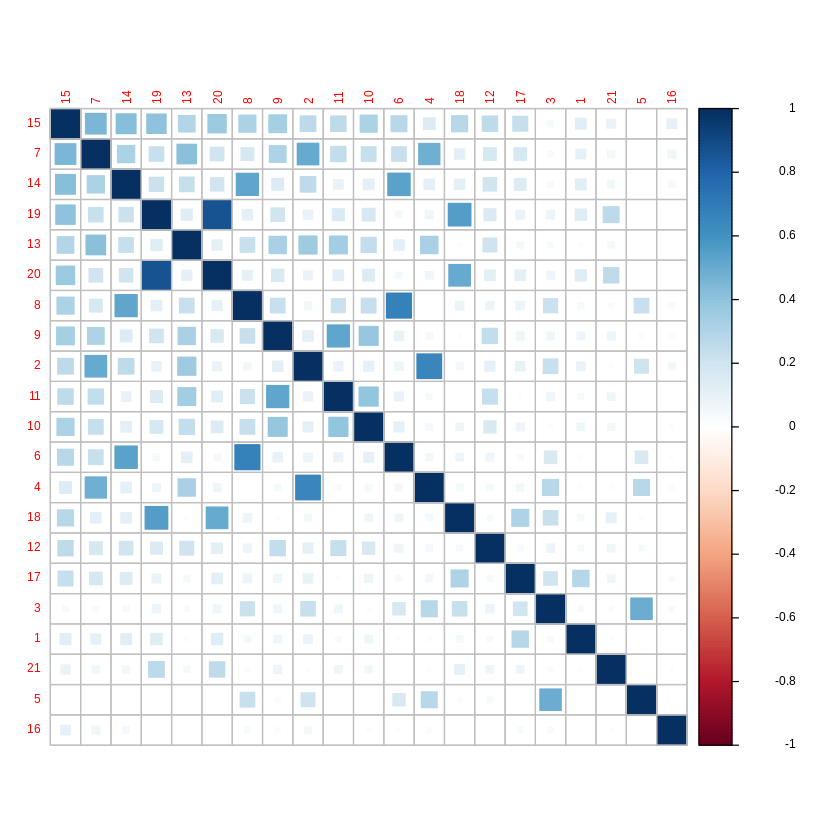

In [57]:
processed_training<-NPREPROCESSING_redundantFields(dataset=processed_training,cutoff=OUTLIER_CONF)

In [58]:
# number of records after remove redundancies
print(paste("number of rows : ",nrow(processed_training)))

[1] "number of rows :  259760"


# Model Training 

In [59]:
#  Sample a training set 

processed_training<-processed_training[sample(nrow(processed_training)),]
head(processed_training)

,Age,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,⋯,Checkinservice,Cleanliness,Onlineboarding,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84000,0.6164384,0.6,1.0,1.0,1.0,0.6,0.6,0.6,0.6,0.6,⋯,0.6,0.4,0.6,0,1,0,1,1,0,0
135585,0.4383562,0.2,0.8,0.2,0.2,0.2,0.2,0.4,1.0,1.0,⋯,0.6,0.2,0.4,1,0,0,0,0,1,0
223151,0.6164384,1.0,0.6,1.0,0.6,0.6,0.8,0.6,0.8,0.8,⋯,0.6,0.8,1.0,0,0,0,1,1,0,0
75282,0.7260274,0.4,1.0,1.0,1.0,0.8,0.6,0.4,0.4,0.4,⋯,0.8,0.4,0.6,1,1,0,1,0,1,0
47777,0.2739726,0.4,0.4,0.4,0.6,0.8,0.4,0.8,1.0,0.6,⋯,0.8,1.0,0.8,1,1,1,1,1,0,0
154589,0.8630137,0.8,0.8,0.6,0.2,0.6,0.4,0.6,0.4,0.6,⋯,0.8,0.8,0.8,1,1,0,0,0,1,0


In [61]:
training_records<-round(nrow(processed_training)*(HOLDOUT/100))
training_data <- processed_training[1:training_records,]
testing_data <- processed_training[-(1:training_records),]
print(nrow(training_data))
print(nrow(testing_data))

[1] 181832
[1] 77928


In [68]:
OUTPUT_FIELD = "satisfactionv2"

myModelFormula<-function(dataset,fieldNameOutput){

  inputs<-paste(names(dataset)[which(names(dataset)!=fieldNameOutput)],collapse = "+")

  output<-paste(fieldNameOutput,"~")

  formular=as.formula(paste(output,inputs))

  return(formular)

} #endof myModelFormula()



myModelFormula(training_data,OUTPUT_FIELD)

satisfactionv2 ~ Age + Seatcomfort + DepartureArrivaltimeconvenient + 
    Foodanddrink + Gatelocation + Inflightwifiservice + Inflightentertainment + 
    EaseofOnlinebooking + Onboardservice + Legroomservice + Baggagehandling + 
    Checkinservice + Cleanliness + Onlineboarding + Gender + 
    CustomerType + TypeofTravel + ClassBusiness + ClassEco + 
    ClassEco.Plus
<environment: 0x55ac60463330>

[1] "this is my modelling function"
satisfactionv2 ~ Age + Seatcomfort + DepartureArrivaltimeconvenient + 
    Foodanddrink + Gatelocation + Inflightwifiservice + Inflightentertainment + 
    EaseofOnlinebooking + Onboardservice + Legroomservice + Baggagehandling + 
    Checkinservice + Cleanliness + Onlineboarding + Gender + 
    CustomerType + TypeofTravel + ClassBusiness + ClassEco + 
    ClassEco.Plus
<environment: 0x55ac5a6b35f8>


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


$TP
[1] 33598

$FN
[1] 6185

$TN
[1] 30888

$FP
[1] 7257

$accuracy
[1] 82.75074

$pgood
[1] 82.23718

$pbad
[1] 83.3167

$FPR
[1] 19.02477

$TPR
[1] 84.45316

$TNR
[1] 80.97523

$MCC
[1] 0.654911

[1] "In my performance plot"
[1] "at end of performance plot"
[1] "finished function"


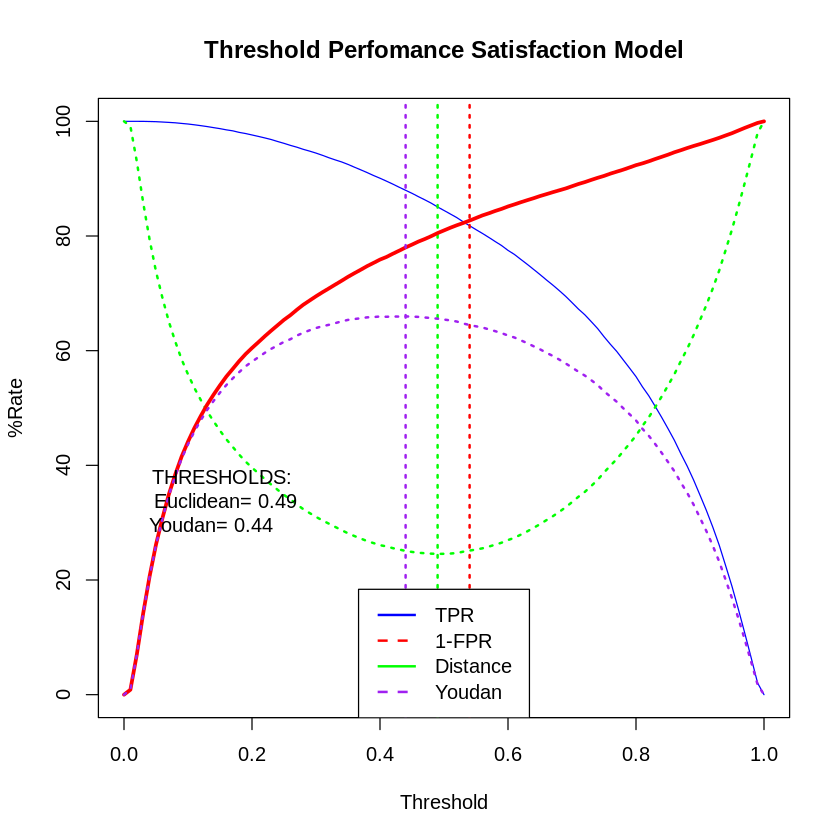

In [69]:
myEvaluateClassifier<-function(probs,testing_data,threshold) {

  predictedClass<-ifelse(as.numeric(probs)<threshold,0,1)
  expectedClass<-testing_data[,OUTPUT_FIELD]

  results<-NcalcConfusion(expectedClass=expectedClass,
                          predictedClass=predictedClass)

  return(results)
}

myPerformancePlot<-function(probs,testing_data){

  print("In my performance plot")

  # ************************************************
  # Q23
  toPlot<-data.frame()

  #Vary the threshold
  for(threshold in seq(0,1,by=0.01)){
    results<-myEvaluateClassifier(probs=probs,testing_data=testing_data,threshold=threshold)
    toPlot<-rbind(toPlot,data.frame(x=threshold,fpr=results$FPR,tpr=results$TPR))
  }

  toPlot$youdan<-toPlot$tpr+(1-toPlot$fpr)-1

  # Q25 use which.max() to return a single index to the higest value in the vector
  maxYoudan<-toPlot$x[which.max(toPlot$youdan)]

  toPlot$distance<-sqrt(((100-toPlot$tpr)^2)+(toPlot$fpr^2))

  minEuclidean<-toPlot$x[which.min(toPlot$distance)]

  plot(x=toPlot$x,y=toPlot$tpr, type="l",col="blue",
       xlab="Threshold",
       ylab="%Rate",
       main="Threshold Perfomance Satisfaction Model")

  # Plot the Euclidean distance to "perfect" classifier (smallest the best)
  lines(toPlot$x,toPlot$distance,type="l",col="green",lwd=2,lty=3)
  abline(v=minEuclidean,col="green",lty=3,lwd=2)

  # Plot the specificity (1-FPR)
  lines(x=toPlot$x,y=100-toPlot$fpr,type="l",col="red",lwd=3,lty=1)

  # The point where specificity and sensitivity are the same
  crosspoint<-toPlot$x[which(toPlot$tpr<(100-toPlot$fpr))[1]]
  abline(v=crosspoint,col="red",lty=3,lwd=2)

  # Q25 Plot Youdan distance
  lines(toPlot$x,toPlot$youdan,type="l",col="purple",lwd=2,lty=3)
  abline(v=maxYoudan,col="purple",lty=3,lwd=2)

  legend("bottom",c("TPR","1-FPR","Distance","Youdan"),col=c("blue","red","green","purple"),lty=1:2,lwd=2)
  text(x=0,y=50, adj = c(-0.2,2),cex=1,col="black",paste("THRESHOLDS:\nEuclidean=",minEuclidean,"\nYoudan=",maxYoudan))


  print("at end of performance plot")
}


myModelling<-function(training_data,testing_data){

  print("this is my modelling function")

  # ************************************************
  # Q20 - call the formula function
  formular<-myModelFormula(dataset=training_data,fieldNameOutput=OUTPUT_FIELD)
  print(formular)
  # Q21: Build a logistic regression classifier on training dataset
  logisticModel<-stats::glm(formular,data=training_data,family=quasibinomial)

  # Get probabilities of being class 1 from the classifier
  probabilities<-predict(logisticModel, testing_data,type="response")

  # ************************************************
  #Q22: Evaluate the classifier on test dataset
  threshold<-0.5
  results<-myEvaluateClassifier(probs=probabilities,
                                testing_data=testing_data,
                                threshold=threshold)

  # This outputs our results into the "Viewer" in RStudio
  NprintMeasures(results)
  print(results)
  # Plot FPR/TPR through threshold range
  results<-myPerformancePlot(probs=probabilities,testing_data=testing_data)

  print("finished function")
  return(logisticModel)
}

model<-myModelling(training_data,testing_data)

In [70]:
coef_df<-data.frame(model$coeff)

In [71]:
model$coeff

coeff_name  <- names(model$coeff)
coeff_value <- model$coeff
coeff_name
# coef_df<-data.frame(name  = coeff_name,
#                     value = coeff_value)
# coef_df

(Intercept)                            Age 
                     8.1769729                      0.4011138 
                   Seatcomfort DepartureArrivaltimeconvenient 
                    -0.8293538                      0.9256213 
                  Foodanddrink                   Gatelocation 
                     0.5842552                     -0.2092278 
           Inflightwifiservice          Inflightentertainment 
                    -0.6235420                     -2.3637352 
           EaseofOnlinebooking                 Onboardservice 
                    -0.7158980                     -1.4004665 
                Legroomservice                Baggagehandling 
                    -1.2957093                     -0.3714800 
                Checkinservice                    Cleanliness 
                    -1.6041162                     -0.5771715 
                Onlineboarding                         Gender 
                    -1.9256842                     -0.5284749 
                  CustomerType                   TypeofTravel 
                     1.9949845                     -1.5391353 
                 ClassBusiness                       ClassEco 
                    -0.7609553                     -0.0546823 
                 ClassEco.Plus 
                            NA

[1] "(Intercept)"                    "Age"                           
 [3] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [5] "Foodanddrink"                   "Gatelocation"                  
 [7] "Inflightwifiservice"            "Inflightentertainment"         
 [9] "EaseofOnlinebooking"            "Onboardservice"                
[11] "Legroomservice"                 "Baggagehandling"               
[13] "Checkinservice"                 "Cleanliness"                   
[15] "Onlineboarding"                 "Gender"                        
[17] "CustomerType"                   "TypeofTravel"                  
[19] "ClassBusiness"                  "ClassEco"                      
[21] "ClassEco.Plus"

ERROR: Error in df$Let: object of type 'closure' is not subsettable


[1] "(Intercept)"                    "Age"                           
 [3] "FlightDistance"                 "Inflightwifiservice"           
 [5] "DepartureArrivaltimeconvenient" "EaseofOnlinebooking"           
 [7] "Gatelocation"                   "Foodanddrink"                  
 [9] "Onlineboarding"                 "Seatcomfort"                   
[11] "Inflightentertainment"          "Onboardservice"                
[13] "Legroomservice"                 "Baggagehandling"               
[15] "Checkinservice"                 "Inflightservice"               
[17] "Cleanliness"                    "Gender"                        
[19] "CustomerType"                   "TypeofTravel"                  
[21] "ClassBusiness"                  "ClassEco"                      
[23] "ClassEco.Plus"